In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import cftime
import datetime
from datetime import date
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import numpy
import pandas
from PIL import Image
import random
import xarray as xr

In [2]:
Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Data/Output_Files_V6/'
NetCDF_Diri = '/glade/derecho/scratch/whimkao/NetCDF_Files_V6/'
Output_Diri = '/glade/u/home/whimkao//ExtraTrack/ExtraTrack_Github/RCP_Figs/Analysis_Figs_V6.6.2/'

In [3]:
# Open File
def Open_File(File):
    DF = pandas.read_csv(File)
    DF = DF.drop("Unnamed: 0", axis=1)
    return (DF)

In [4]:
# Open Each File
def Files_Open(Model, Diri, Subset):
    Data_DF = Open_File(Diri+Model+'_Data_'+Subset+'_Output_V6.csv')
    ET_DF = Open_File(Diri+Model+'_ET_'+Subset+'_Output_V6.csv')
    Codes_DF = Open_File(Diri+Model+'_Codes_Output_V6.csv')
# Edit Time Format
    Time, Begin_Time, Compl_Time, Trop_Peak_Time, Peak_Time, Birth_Time = [], [], [], [], [], []
    for i in range(len(Data_DF)):
        Time.append(Datetime(Data_DF["Time(Z)"][i]))
    for j in range(len(ET_DF)):
        Begin_Time.append(Datetime(ET_DF["ET Begin Time"][j]))
        Compl_Time.append(Datetime(ET_DF["ET Complete Time"][j]))
        Trop_Peak_Time.append(Datetime(ET_DF["Trop Peak Time"][j]))
        Peak_Time.append(Datetime(ET_DF["Peak Time"][j]))
        Birth_Time.append(Datetime(ET_DF["Genesis Time"][j]))
    Data_DF["Time(Z)"] = Time
    ET_DF["ET Begin Time"] = Begin_Time
    ET_DF["ET Complete Time"] = Compl_Time
    ET_DF["Trop Peak Time"] = Trop_Peak_Time
    ET_DF["Peak Time"] = Peak_Time
    ET_DF["Genesis Time"] = Birth_Time
    return (Data_DF, ET_DF, Codes_DF)

In [5]:
def Datetime(Time):
    try:
        New_Time = datetime.datetime.strptime(Time, '%Y-%m-%d %H:%M:%S')
    except:
        New_Time = numpy.nan
    return (New_Time)

In [6]:
# Create Phase Distribution Bins
def Create_Bins(Min, Max, Bin_Width):
    Bins = numpy.arange(Min, Max+Bin_Width, Bin_Width)
    return (Bins)
Lat_Bins = Create_Bins(10,60,5)
Lon_Bins = Create_Bins(-100,20,5)

In [7]:
Num_Years = numpy.array([90,93,93])

In [8]:
# Function to Find Distance Between Two Points
def Find_Distance(y1, y2, x1, x2):
    Start_Lat = y1 * numpy.pi / 180
    End_Lat = y2 * numpy.pi / 180
    Start_Lon = x1 * numpy.pi / 180
    End_Lon = x2 * numpy.pi / 180
    Lat_Diff = End_Lat - Start_Lat
    Lon_Diff = End_Lon - Start_Lon
    Earth_Rad = 6378
    Distance = 2 * Earth_Rad * numpy.sqrt((numpy.sin(Lat_Diff/2))**2 + \
    numpy.cos(Start_Lat) * numpy.cos(End_Lat) * (numpy.sin(Lon_Diff/2))**2)
    return (Distance)

In [9]:
# Find a Specific Storm Within the DataFrame
def Find_Storm(DF, Code):
    DF_Storm = DF[DF["Code"] == Code].reset_index()
    return (DF_Storm)

In [10]:
Control_Data, Control_ET, Control_Codes = Files_Open("Control", Diri, "SubsetB")
RCP45_Data, RCP45_ET, RCP45_Codes = Files_Open("RCP45", Diri, "SubsetB")
RCP85_Data, RCP85_ET, RCP85_Codes = Files_Open("RCP85", Diri, "SubsetB")

In [11]:
Months_Name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jun-Aug', 'Sep-Nov', 'Dec-May', 'Annual']

In [12]:
# Create Function to Open Monthly Files
def Open_Monthly_File(Model):
    DS_Dict = {}
    for i in range(len(Months_Name)):
        File_Name = str(Model+'_Output_'+Months_Name[i]+'_V6.nc')
        Month_DS = xr.open_dataset(NetCDF_Diri + File_Name)
        DS_Dict[Months_Name[i]] = Month_DS
        print (i)
    return (DS_Dict)

In [13]:
# Open Monthly Files
Control_DS_Dict = Open_Monthly_File("Control")
RCP45_DS_Dict = Open_Monthly_File("RCP45")
RCP85_DS_Dict = Open_Monthly_File("RCP85")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [14]:
Control_DS_Dict['Sep-Nov']

<xarray.Dataset> Size: 2MB
Dimensions:  (plev: 13, lat: 61, lon: 101)
Coordinates:
  * lat      (lat) float64 488B 0.0 1.0 2.0 3.0 4.0 ... 56.0 57.0 58.0 59.0 60.0
  * lon      (lon) float64 808B -100.0 -99.0 -98.0 -97.0 ... -3.0 -2.0 -1.0 0.0
  * plev     (plev) float64 104B 1e+05 9.25e+04 8.5e+04 ... 1.5e+04 1e+04 5e+03
Data variables:
    T        (plev, lat, lon) float32 320kB ...
    TS       (lat, lon) float32 25kB ...
    Z3       (plev, lat, lon) float32 320kB ...
    PSL      (lat, lon) float32 25kB ...
    U        (plev, lat, lon) float32 320kB ...
    V        (plev, lat, lon) float32 320kB ...
    FLUT     (lat, lon) float32 25kB ...
    TMQ      (lat, lon) float32 25kB ...
    OMEGA    (plev, lat, lon) float32 320kB ...
    OCNFRAC  (lat, lon) float32 25kB ...

In [15]:
# Create Function For Plotting Contour Maps of Variables
def Variable_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Var, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Diff_Label, Diff_Plot, Savefig, Figname):
# Create Fig
    Fig = pyplot.figure(figsize=(18,14))
#
# Produce Dataset
    for i in range(len(Months)):
        Month = Months[i]
        if Var == 'PSL' or Var == 'TMQ' or Var == 'FLUT':
            Control_DS_Var = Control_DS_Dict[Month][Var]
            RCP45_DS_Var = RCP45_DS_Dict[Month][Var]
            RCP85_DS_Var = RCP85_DS_Dict[Month][Var]           
        else:
            Control_DS_Var = Control_DS_Dict[Month].sel(plev=Plev)[Var]
            RCP45_DS_Var = RCP45_DS_Dict[Month].sel(plev=Plev)[Var]
            RCP85_DS_Var = RCP85_DS_Dict[Month].sel(plev=Plev)[Var]
        RCP45_DS_Var_Diff = RCP45_DS_Var - Control_DS_Var
        RCP85_DS_Var_Diff = RCP85_DS_Var - Control_DS_Var
#
# Plot Control
        Axis = Fig.add_subplot(3,3,i+1, projection=ccrs.PlateCarree())
        Plot_Contour_Map(Axis, Control_DS_Var, Bounds, Colours, str("Control (" + Month + ")"))
#
# Colour Bar
        if i == 1:
            C_Map = mcolors.LinearSegmentedColormap.from_list(Var, Colours, N=len(Colours))
            if Var == 'TS' or Var == 'T':
                Norm = mcolors.BoundaryNorm(Bounds-273.15, C_Map.N, extend='both')
            elif Var == 'PSL':
                Norm = mcolors.BoundaryNorm(Bounds/100, C_Map.N, extend='both')
            else:
                Norm = mcolors.BoundaryNorm(Bounds, C_Map.N, extend='both')
            Cax = Axis.inset_axes([0.02, -0.10, 0.96, 0.02], transform=Axis.transAxes)
            Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', \
            cax=Cax, label=Label, shrink=0.7)
#
# Plot RCP4.5 or RCP4.5-Control
        Axis = Fig.add_subplot(3,3,i+4, projection=ccrs.PlateCarree())
        if Diff_Plot == False:
            Plot_Contour_Map(Axis, RCP45_DS_Var, Bounds, Colours, str("RCP4.5 (" + Month + ")"))
        else:
            Plot_Contour_Map(Axis, RCP45_DS_Var_Diff, Diff_Bounds, Diff_Colours, \
            str("RCP4.5 - Control (" + Month + ")"))
#
# Colour Bar For Diff Plots
            if i == 1:
                C_Map = mcolors.LinearSegmentedColormap.from_list(Var, Diff_Colours, N=len(Diff_Colours))
                if Var == 'PSL':
                    Norm = mcolors.BoundaryNorm(Diff_Bounds/100, C_Map.N, extend='both')
                else:
                    Norm = mcolors.BoundaryNorm(Diff_Bounds, C_Map.N, extend='both')
                Cax = Axis.inset_axes([0.02, -0.10, 0.96, 0.02], transform=Axis.transAxes)
                Fig.colorbar(ScalarMappable(cmap=C_Map, norm=Norm), orientation='horizontal', \
                cax=Cax, label=Diff_Label, shrink=0.7)
#
# Plot RCP8.5 or RCP8.5-Control
        Axis = Fig.add_subplot(3,3,i+7, projection=ccrs.PlateCarree())
        if Diff_Plot == False:
            Plot_Contour_Map(Axis, RCP85_DS_Var, Bounds, Colours, str("RCP8.5 (" + Month + ")"))
        else:
            Plot_Contour_Map(Axis, RCP85_DS_Var_Diff, Diff_Bounds, Diff_Colours, \
            str("RCP8.5 - Control (" + Month + ")"))
#
# Save Fig
    Fig.tight_layout()
    if Savefig == True:
        Fig.savefig(Output_Diri+Figname, bbox_inches='tight')

In [16]:
# Plotting Contour Map
def Plot_Contour_Map(Axis, DS, Bounds, Colours, Title):
    pyplot.contourf(DS['lon'], DS['lat'], DS, levels=Bounds, colors=Colours, extend='both')
# Formatting
    Axis.coastlines(linewidth=0.5)
    Axis.add_feature(cfeature.BORDERS, linewidth=0.5)
    Axis.add_feature(cfeature.STATES, linewidth=0.3)
    x_Min, x_Max, y_Min, y_Max = -100, -10, 0, 60
    x_Axis = Create_Bins(x_Min, x_Max, 10)
    y_Axis = Create_Bins(y_Min, y_Max, 10)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    Axis.set_xlim(x_Min,x_Max)
    Axis.set_ylim(y_Min,y_Max)
    Axis.set_title(Title, fontsize=18)
    Gridline = Axis.grid(linewidth=0.3, color='silver', linestyle='-')

In [17]:
# Define Colours and Bounds
# Surface Temperature
Temp_Sfc_Colours = ['mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lightseagreen', 'limegreen', \
'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'orangered', 'red', 'firebrick']
Temp_Sfc_Bounds_C = numpy.array([20,21,22,23,24,25,26,27,28,29,30,31,32])
Temp_Sfc_Bounds_K = Temp_Sfc_Bounds_C + 273.15
Temp_Sfc_Diff_Colours = ['mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'white', \
'gold', 'orange', 'darkorange', 'orangered', 'red', 'firebrick']
Temp_Sfc_Diff_Bounds = numpy.array([-2,-1.5,-1,-0.5,0.5,1,1.5,2,2.5,3])
#
# 850hPa Temperature
Temp_850hPa_Colours = ['mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lightseagreen', 'limegreen', \
'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'orangered', 'red', 'firebrick']
Temp_850hPa_Bounds_C = Create_Bins(0,25,2.5)
Temp_850hPa_Bounds_K = Temp_850hPa_Bounds_C + 273.15
Temp_850hPa_Diff_Colours = ['mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'white', \
'gold', 'orange', 'darkorange', 'orangered', 'red', 'firebrick']
Temp_850hPa_Diff_Bounds = numpy.array([-4,-3,-2,-1,1,2,3,4,5,6])
#
# 500hPa Temperature
Temp_500hPa_Colours = ['mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lightseagreen', 'limegreen', \
'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'orangered', 'red', 'firebrick']
Temp_500hPa_Bounds_C = Create_Bins(-30,0,2.5)
Temp_500hPa_Bounds_K = Temp_500hPa_Bounds_C + 273.15
Temp_500hPa_Diff_Colours = ['mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'white', \
'gold', 'orange', 'darkorange', 'orangered', 'red', 'firebrick']
Temp_500hPa_Diff_Bounds = numpy.array([-4,-3,-2,-1,1,2,3,4,5,6])
#
# 500hPa Geopotential Height
Z_500hPa_Colours = ['mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lightseagreen', 'limegreen', \
'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'orangered', 'red', 'firebrick']
Z_500hPa_Bounds = Create_Bins(5400,6000,50)
Z_500hPa_Diff_Colours = ['deepskyblue', 'cyan', 'white', 'gold', 'orange', 'darkorange', 'orangered', 'red', 'firebrick']
Z_500hPa_Diff_Bounds = numpy.array([-40,-20,20,40,60,80,100,120])
#
# Sea Level Pressure
SLP_Colours = ['mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'lightseagreen', 'limegreen', \
'greenyellow', 'yellow', 'gold', 'orange', 'darkorange', 'orangered', 'red', 'firebrick']
SLP_Bounds = Create_Bins(100000,102400,200)
SLP_Diff_Colours = ['mediumblue', 'dodgerblue', 'deepskyblue', 'cyan', 'white', \
'gold', 'orange', 'darkorange', 'orangered', 'red', 'firebrick']
SLP_Diff_Bounds = numpy.array([-200,-150,-100,-50,50,100,150,200,250,300])
#
# 200hPa Zonal Wind
U_200hPa_Colours = ['red', 'darkorange', 'orange', 'gold', 'yellow', 'white', \
'greenyellow', 'limegreen', 'lightseagreen', 'deepskyblue', 'dodgerblue']
U_200hPa_Bounds = numpy.array([-40,-30,-20,-10,-2,2,10,20,30,40])
U_200hPa_Diff_Colours = ['red', 'darkorange', 'orange', 'gold', 'white', \
'lawngreen', 'limegreen', 'forestgreen', 'darkgreen']
U_200hPa_Diff_Bounds = numpy.array([-6,-4,-2,-1,1,2,4,6])
#
# 850hPa Zonal Wind
U_850hPa_Colours = ['red', 'darkorange', 'orange', 'gold', 'yellow', 'white', \
'greenyellow', 'limegreen', 'lightseagreen', 'deepskyblue', 'dodgerblue']
U_850hPa_Bounds = numpy.array([-20,-15,-10,-5,-1,1,5,10,15,20])
U_850hPa_Diff_Colours = ['red', 'darkorange', 'orange', 'gold', 'white', \
'lawngreen', 'limegreen', 'forestgreen', 'darkgreen']
U_850hPa_Diff_Bounds = numpy.array([-3,-2,-1,-0.5,0.5,1,2,3])
#
# Total Precipitable Water
TMQ_Colours = ['white', 'aquamarine', 'springgreen', 'aqua', 'deepskyblue', 'dodgerblue', 'mediumblue', 'navy']
TMQ_Bounds = numpy.array([10,20,30,40,50,60,70])
TMQ_Diff_Colours = ['saddlebrown', 'darkorange', 'orange', 'gold', 'white', \
'cyan', 'deepskyblue', 'dodgerblue', 'mediumblue']
TMQ_Diff_Bounds = numpy.array([-10,-5,-2.5,-1,1,2.5,5,10])

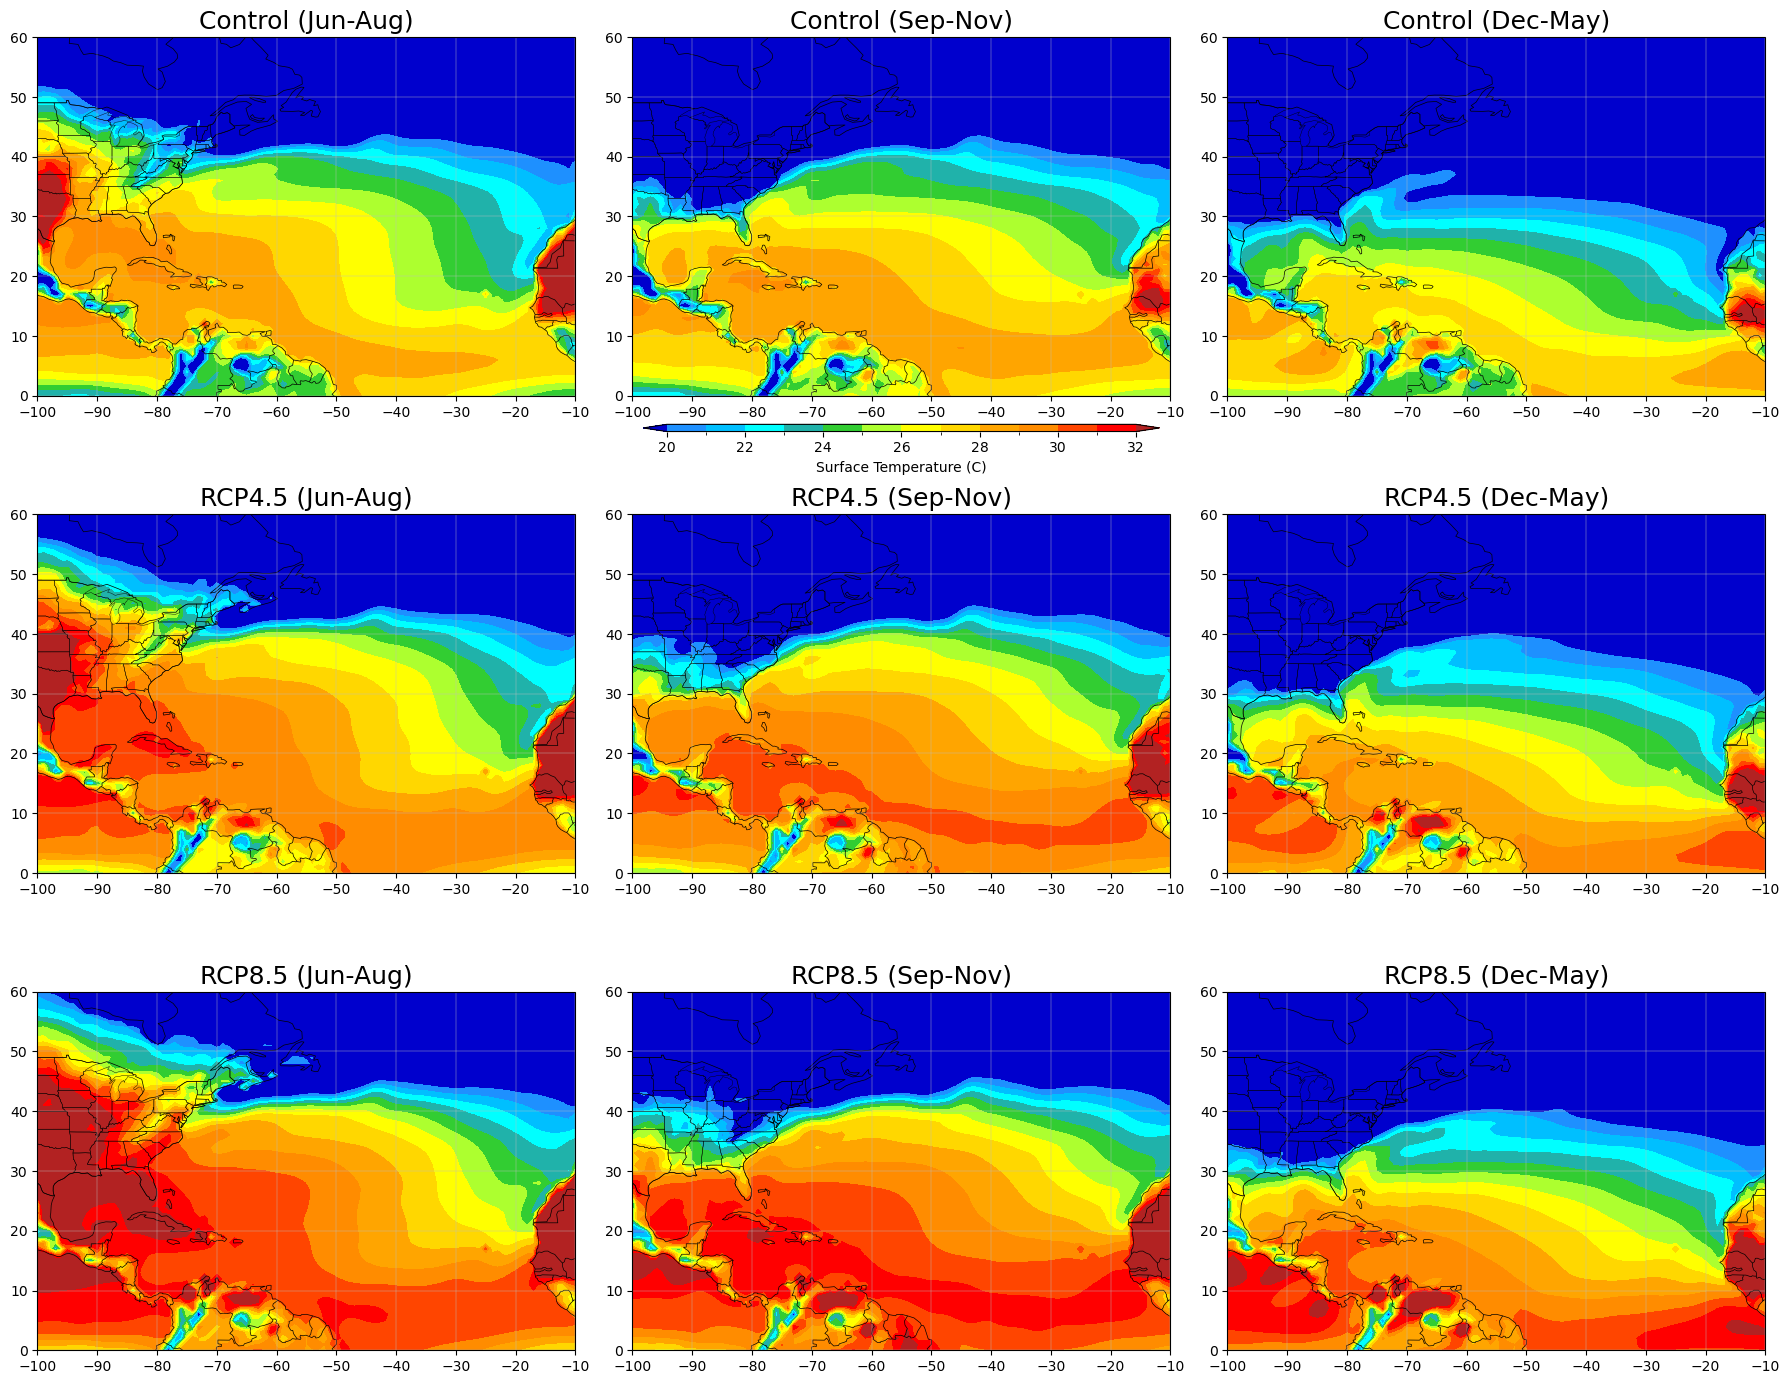

In [18]:
# Plot Surface Temperature
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May']
Var = 'TS'
Plev = 100000
Bounds, Colours = Temp_Sfc_Bounds_K, Temp_Sfc_Colours
Diff_Bounds, Diff_Colours = Temp_Sfc_Diff_Bounds, Temp_Sfc_Diff_Colours
Label, Diff_Label = 'Surface Temperature (C)', 'Surface Temperature Difference (C)'
Diff_Plot = False
Savefig = True
Figname = 'Temp_Sfc_Seasons.png'
Variable_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Var, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Diff_Label, Diff_Plot, Savefig, Figname)

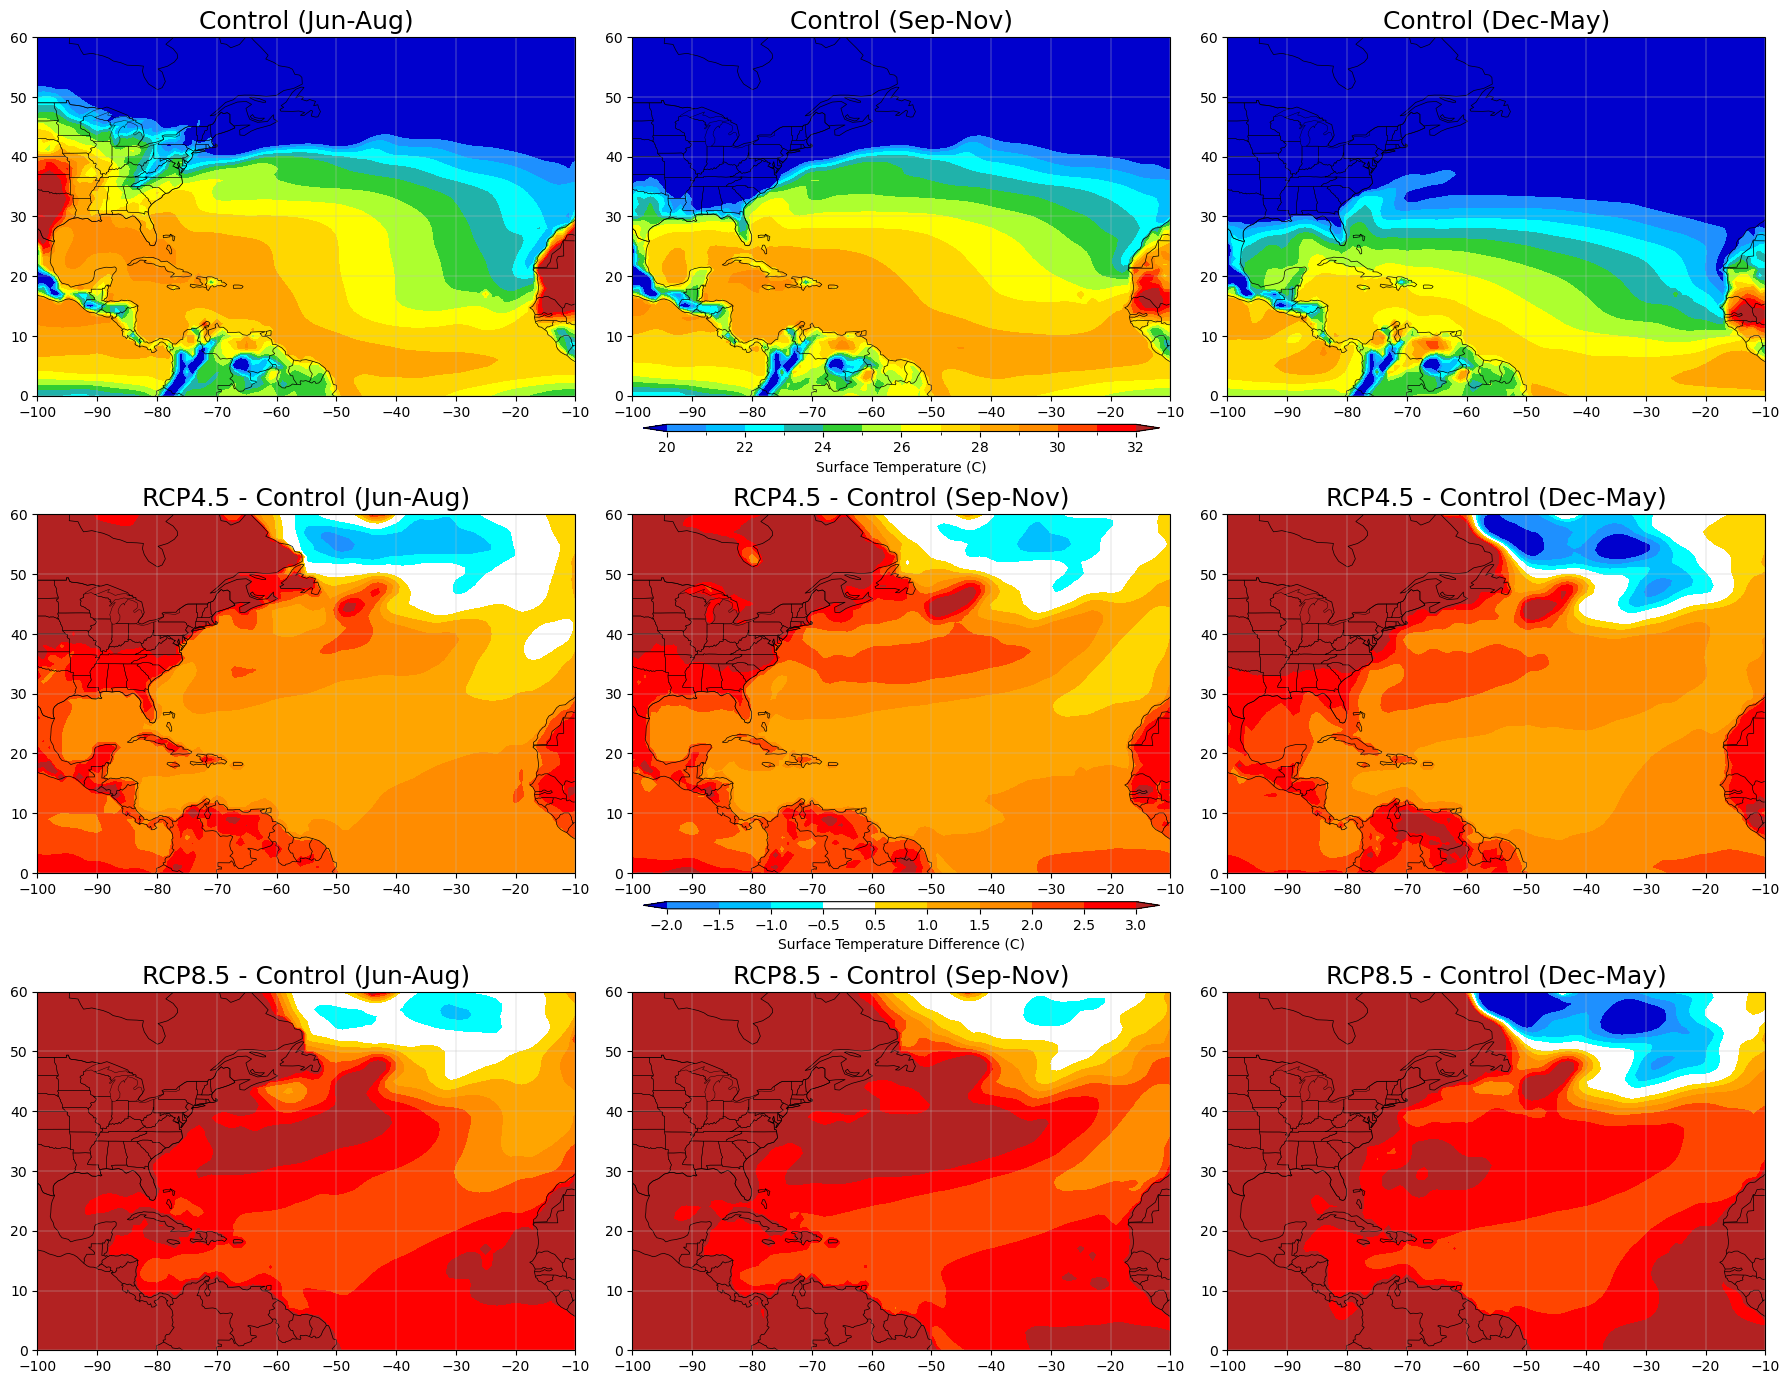

In [19]:
# Plot Surface Temperature Differences
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May']
Var = 'TS'
Plev = 100000
Bounds, Colours = Temp_Sfc_Bounds_K, Temp_Sfc_Colours
Diff_Bounds, Diff_Colours = Temp_Sfc_Diff_Bounds, Temp_Sfc_Diff_Colours
Label, Diff_Label = 'Surface Temperature (C)', 'Surface Temperature Difference (C)'
Diff_Plot = True
Savefig = True
Figname = 'Temp_Sfc_Seasons_Diff.png'
Variable_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Var, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Diff_Label, Diff_Plot, Savefig, Figname)

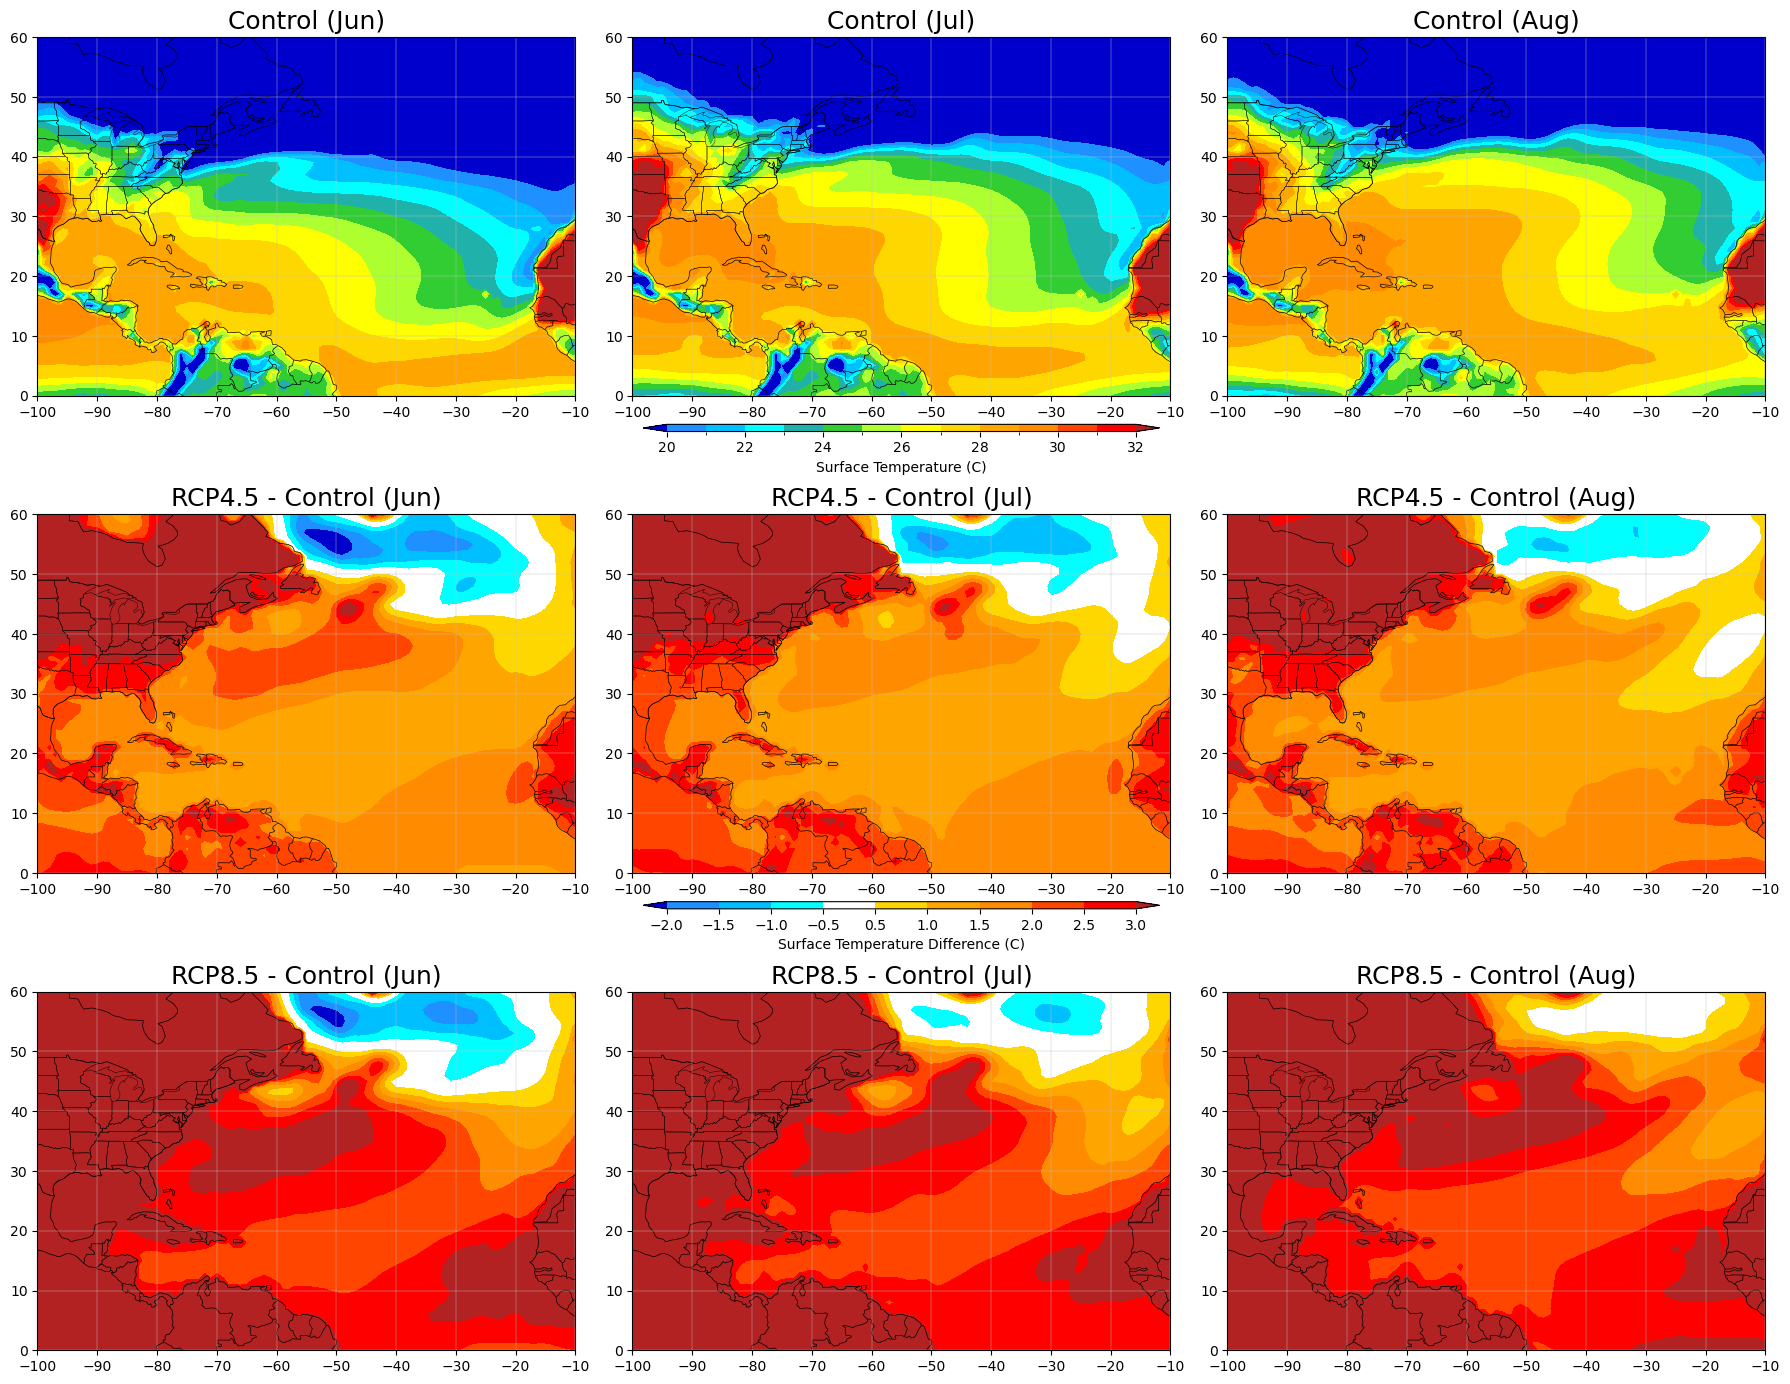

In [20]:
# Plot Surface Temperature
Months = ['Jun', 'Jul', 'Aug']
Var = 'TS'
Plev = 100000
Bounds, Colours = Temp_Sfc_Bounds_K, Temp_Sfc_Colours
Diff_Bounds, Diff_Colours = Temp_Sfc_Diff_Bounds, Temp_Sfc_Diff_Colours
Label, Diff_Label = 'Surface Temperature (C)', 'Surface Temperature Difference (C)'
Diff_Plot = True
Savefig = True
Figname = 'Temp_Sfc_Summer_Diff.png'
Variable_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Var, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Diff_Label, Diff_Plot, Savefig, Figname)

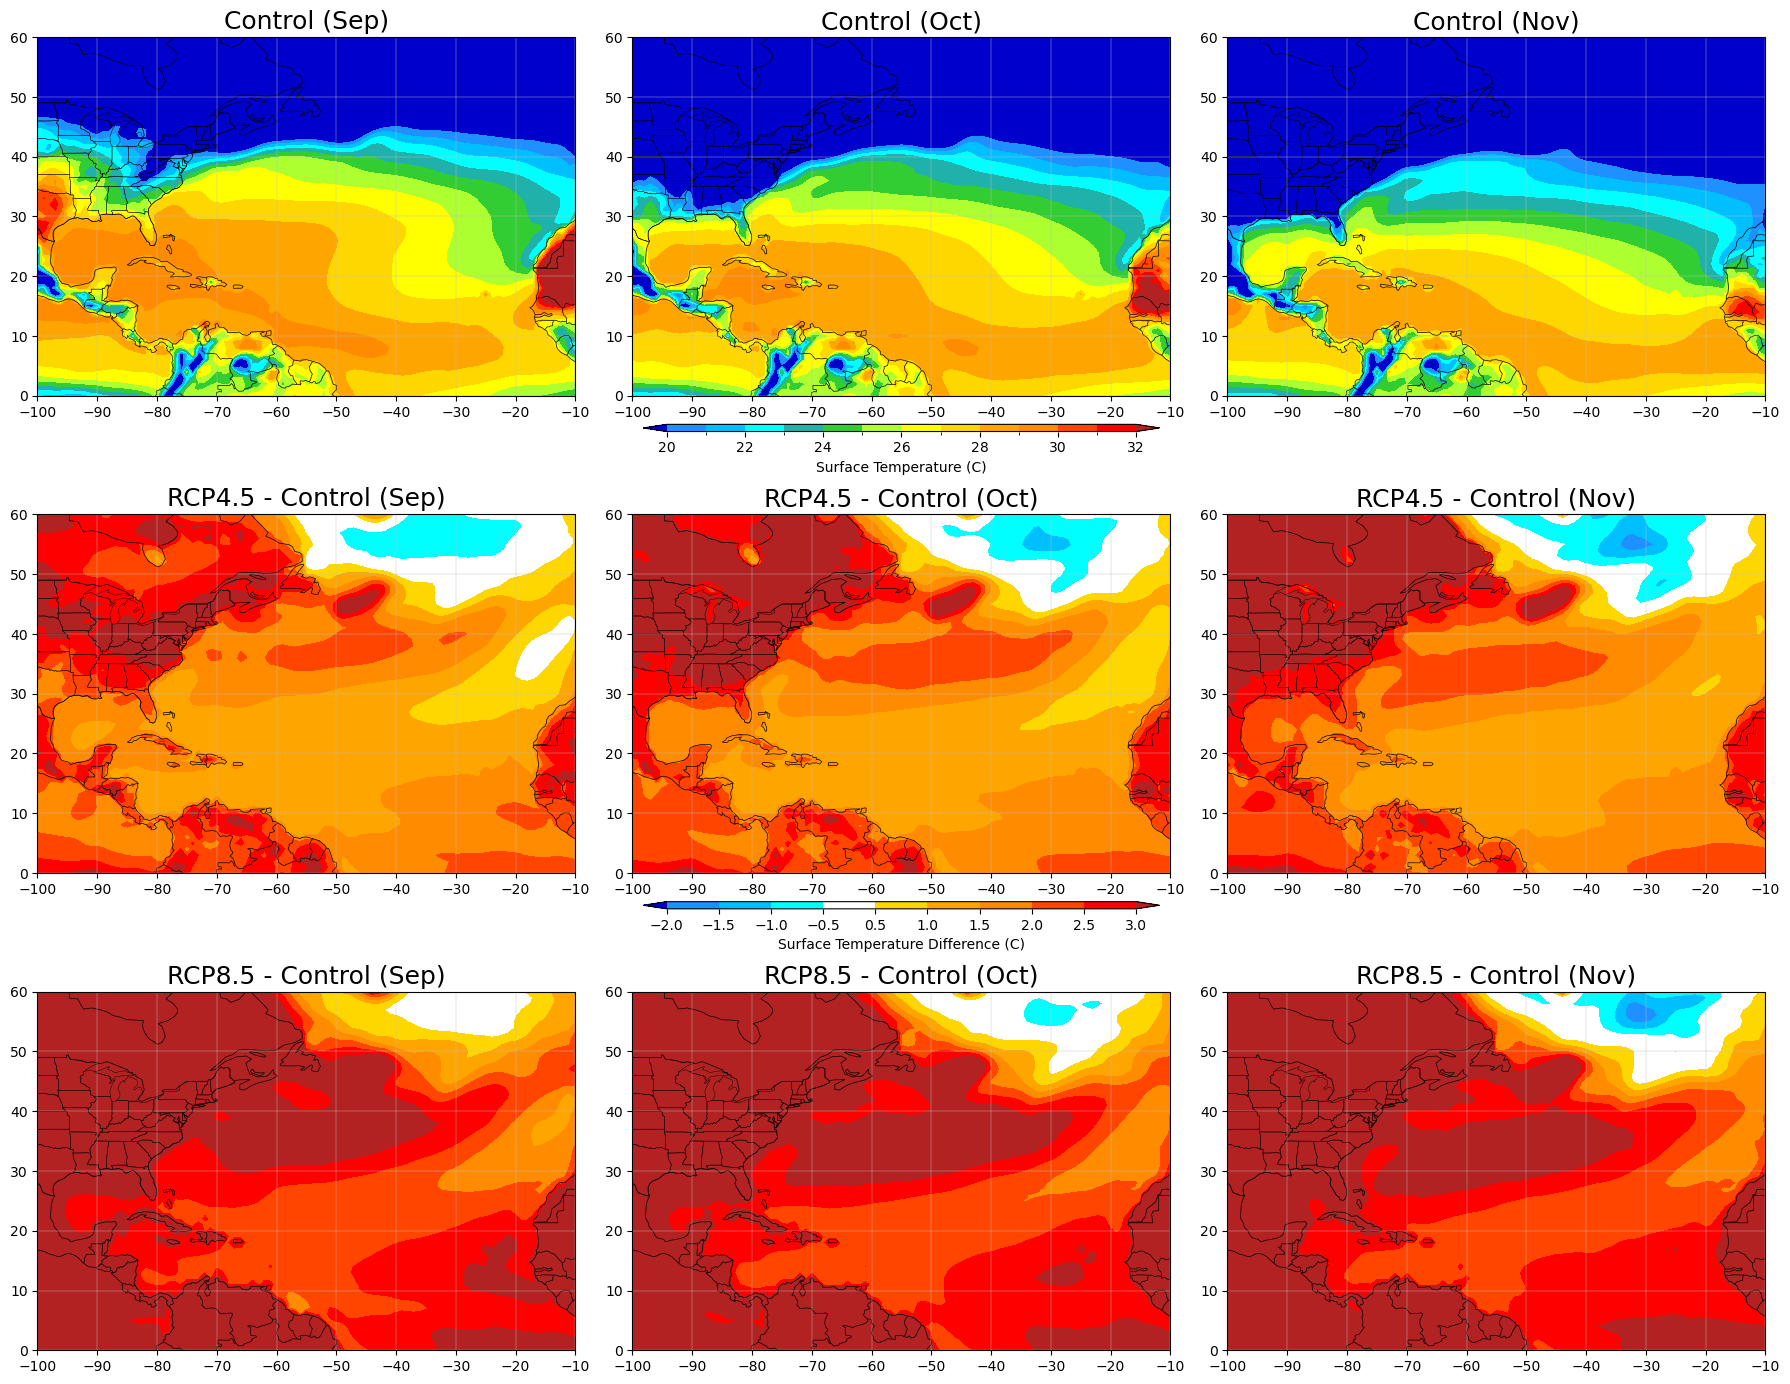

In [21]:
# Plot Surface Temperature
Months = ['Sep', 'Oct', 'Nov']
Var = 'TS'
Plev = 100000
Bounds, Colours = Temp_Sfc_Bounds_K, Temp_Sfc_Colours
Diff_Bounds, Diff_Colours = Temp_Sfc_Diff_Bounds, Temp_Sfc_Diff_Colours
Label, Diff_Label = 'Surface Temperature (C)', 'Surface Temperature Difference (C)'
Diff_Plot = True
Savefig = True
Figname = 'Temp_Sfc_Fall_Diff.png'
Variable_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Var, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Diff_Label, Diff_Plot, Savefig, Figname)

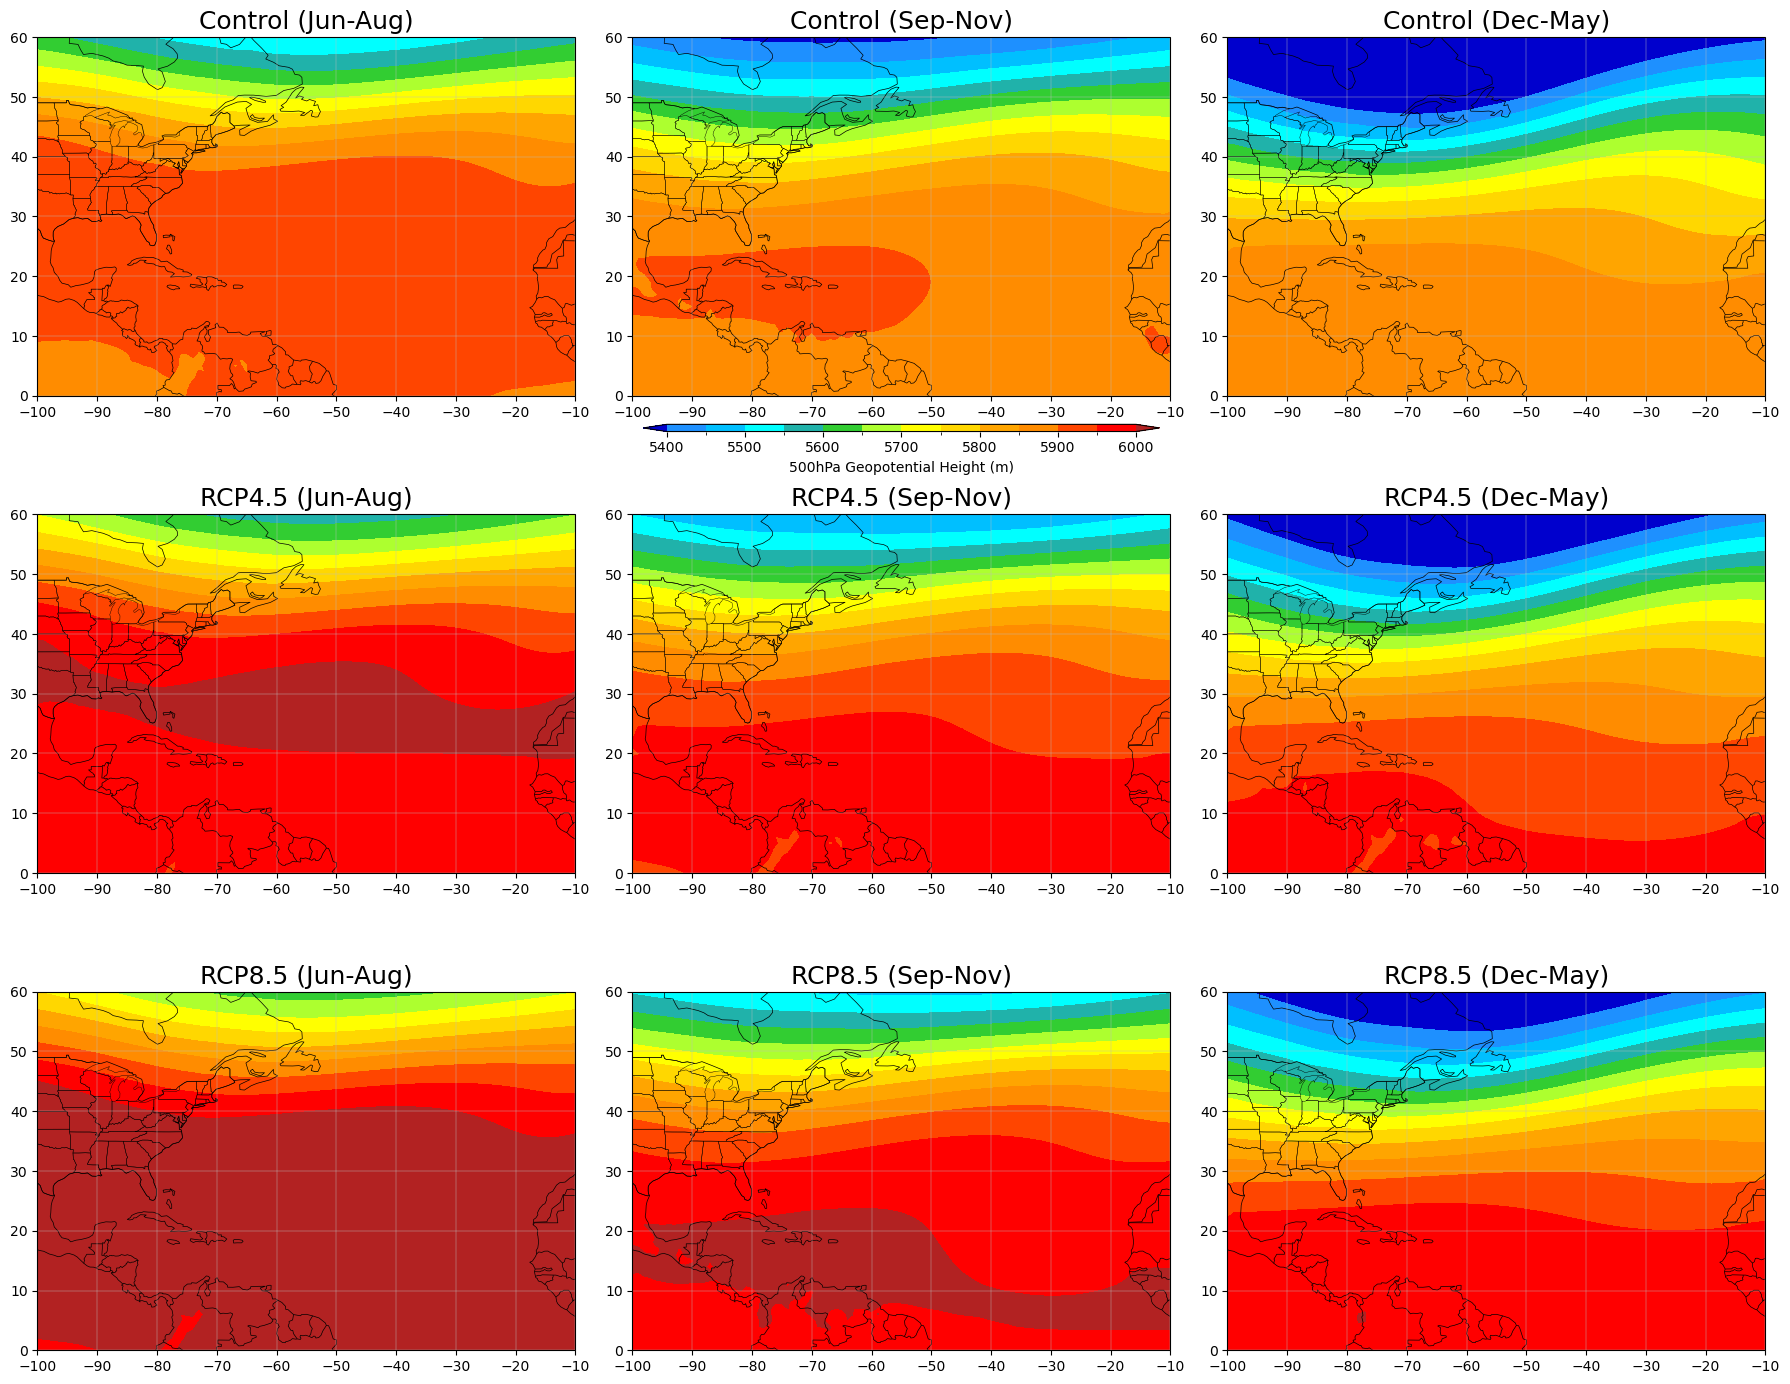

In [22]:
# Plot 500hPa Geopotential Height
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May']
Var = 'Z3'
Plev = 50000
Bounds, Colours = Z_500hPa_Bounds, Z_500hPa_Colours
Diff_Bounds, Diff_Colours = Z_500hPa_Diff_Bounds, Z_500hPa_Diff_Colours
Label, Diff_Label = '500hPa Geopotential Height (m)', '500hPa Geopotential Height Difference (C)'
Diff_Plot = False
Savefig = True
Figname = 'Z_500hPa_Seasons.png'
Variable_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Var, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Diff_Label, Diff_Plot, Savefig, Figname)

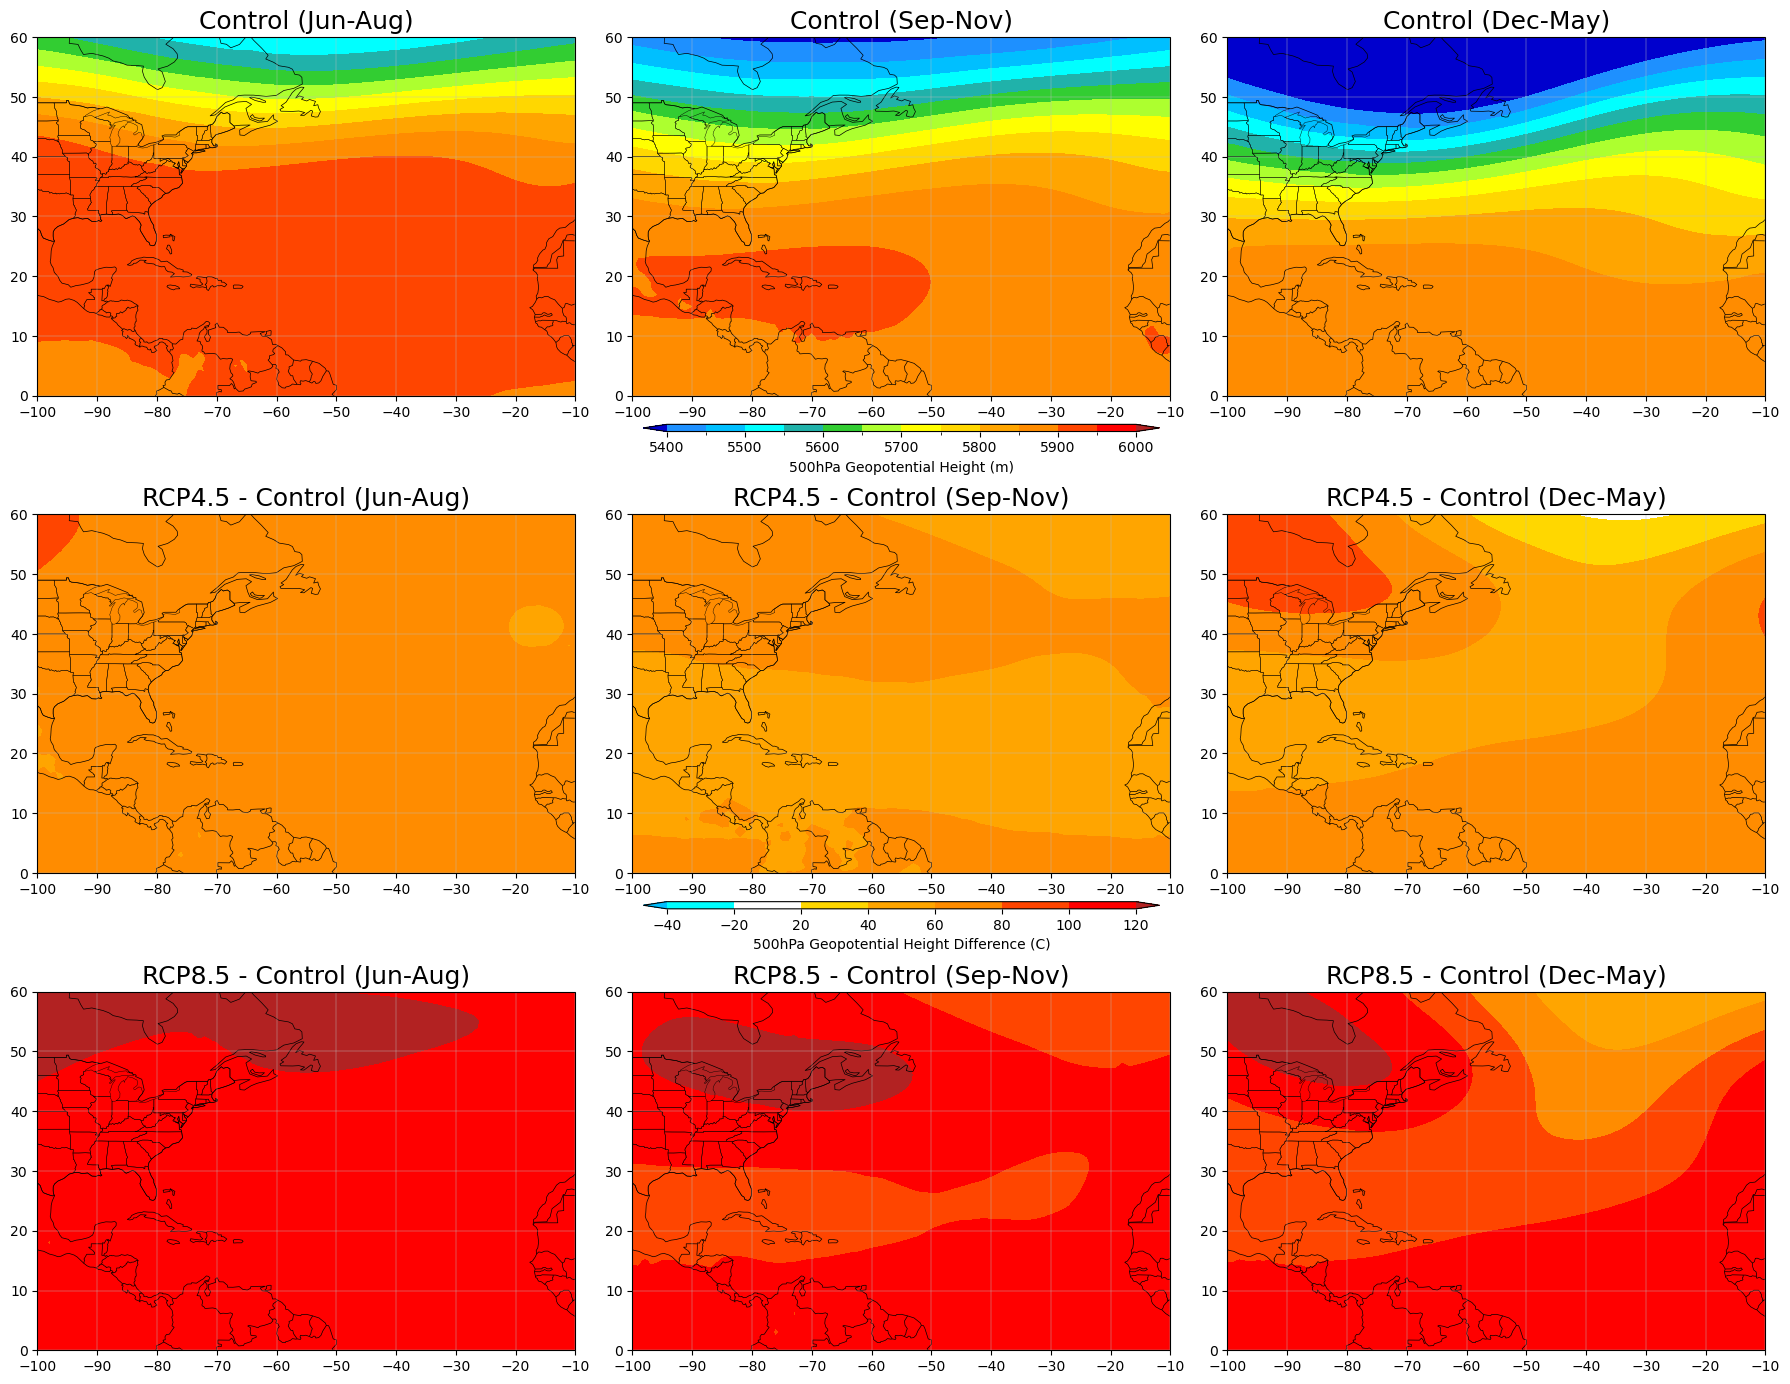

In [23]:
# Plot 500hPa Geopotential Height Differences
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May']
Var = 'Z3'
Plev = 50000
Bounds, Colours = Z_500hPa_Bounds, Z_500hPa_Colours
Diff_Bounds, Diff_Colours = Z_500hPa_Diff_Bounds, Z_500hPa_Diff_Colours
Label, Diff_Label = '500hPa Geopotential Height (m)', '500hPa Geopotential Height Difference (C)'
Diff_Plot = True
Savefig = True
Figname = 'Z_500hPa_Seasons_Diff.png'
Variable_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Var, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Diff_Label, Diff_Plot, Savefig, Figname)

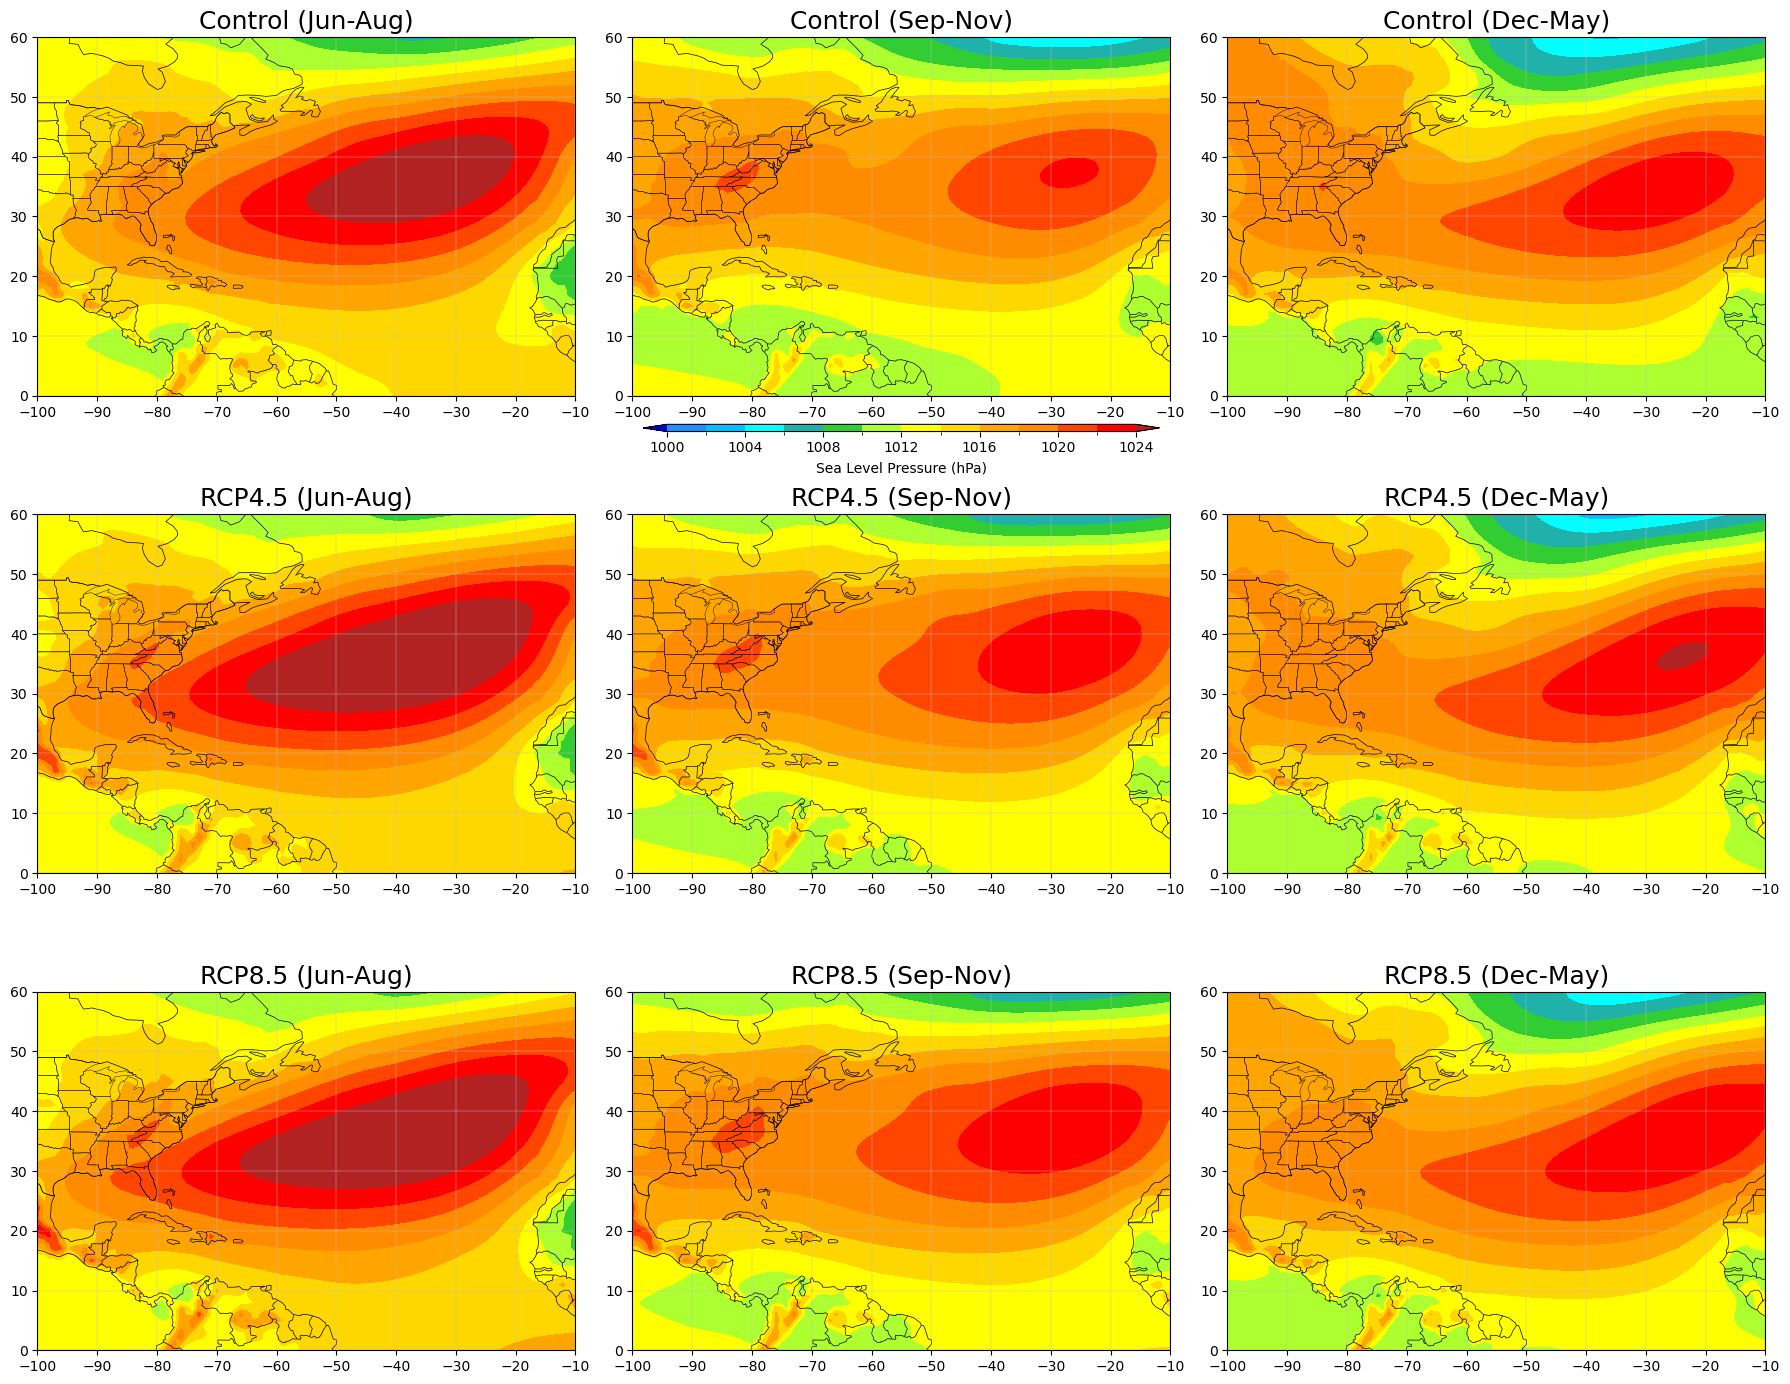

In [24]:
# Plot Sea Level Pressure
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May']
Var = 'PSL'
Plev = 100000
Bounds, Colours = SLP_Bounds, SLP_Colours
Diff_Bounds, Diff_Colours = SLP_Diff_Bounds, SLP_Diff_Colours
Label, Diff_Label = 'Sea Level Pressure (hPa)', 'Sea Level Pressure Difference (hPa)'
Diff_Plot = False
Savefig = True
Figname = 'SLP_Seasons.png'
Variable_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Var, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Diff_Label, Diff_Plot, Savefig, Figname)

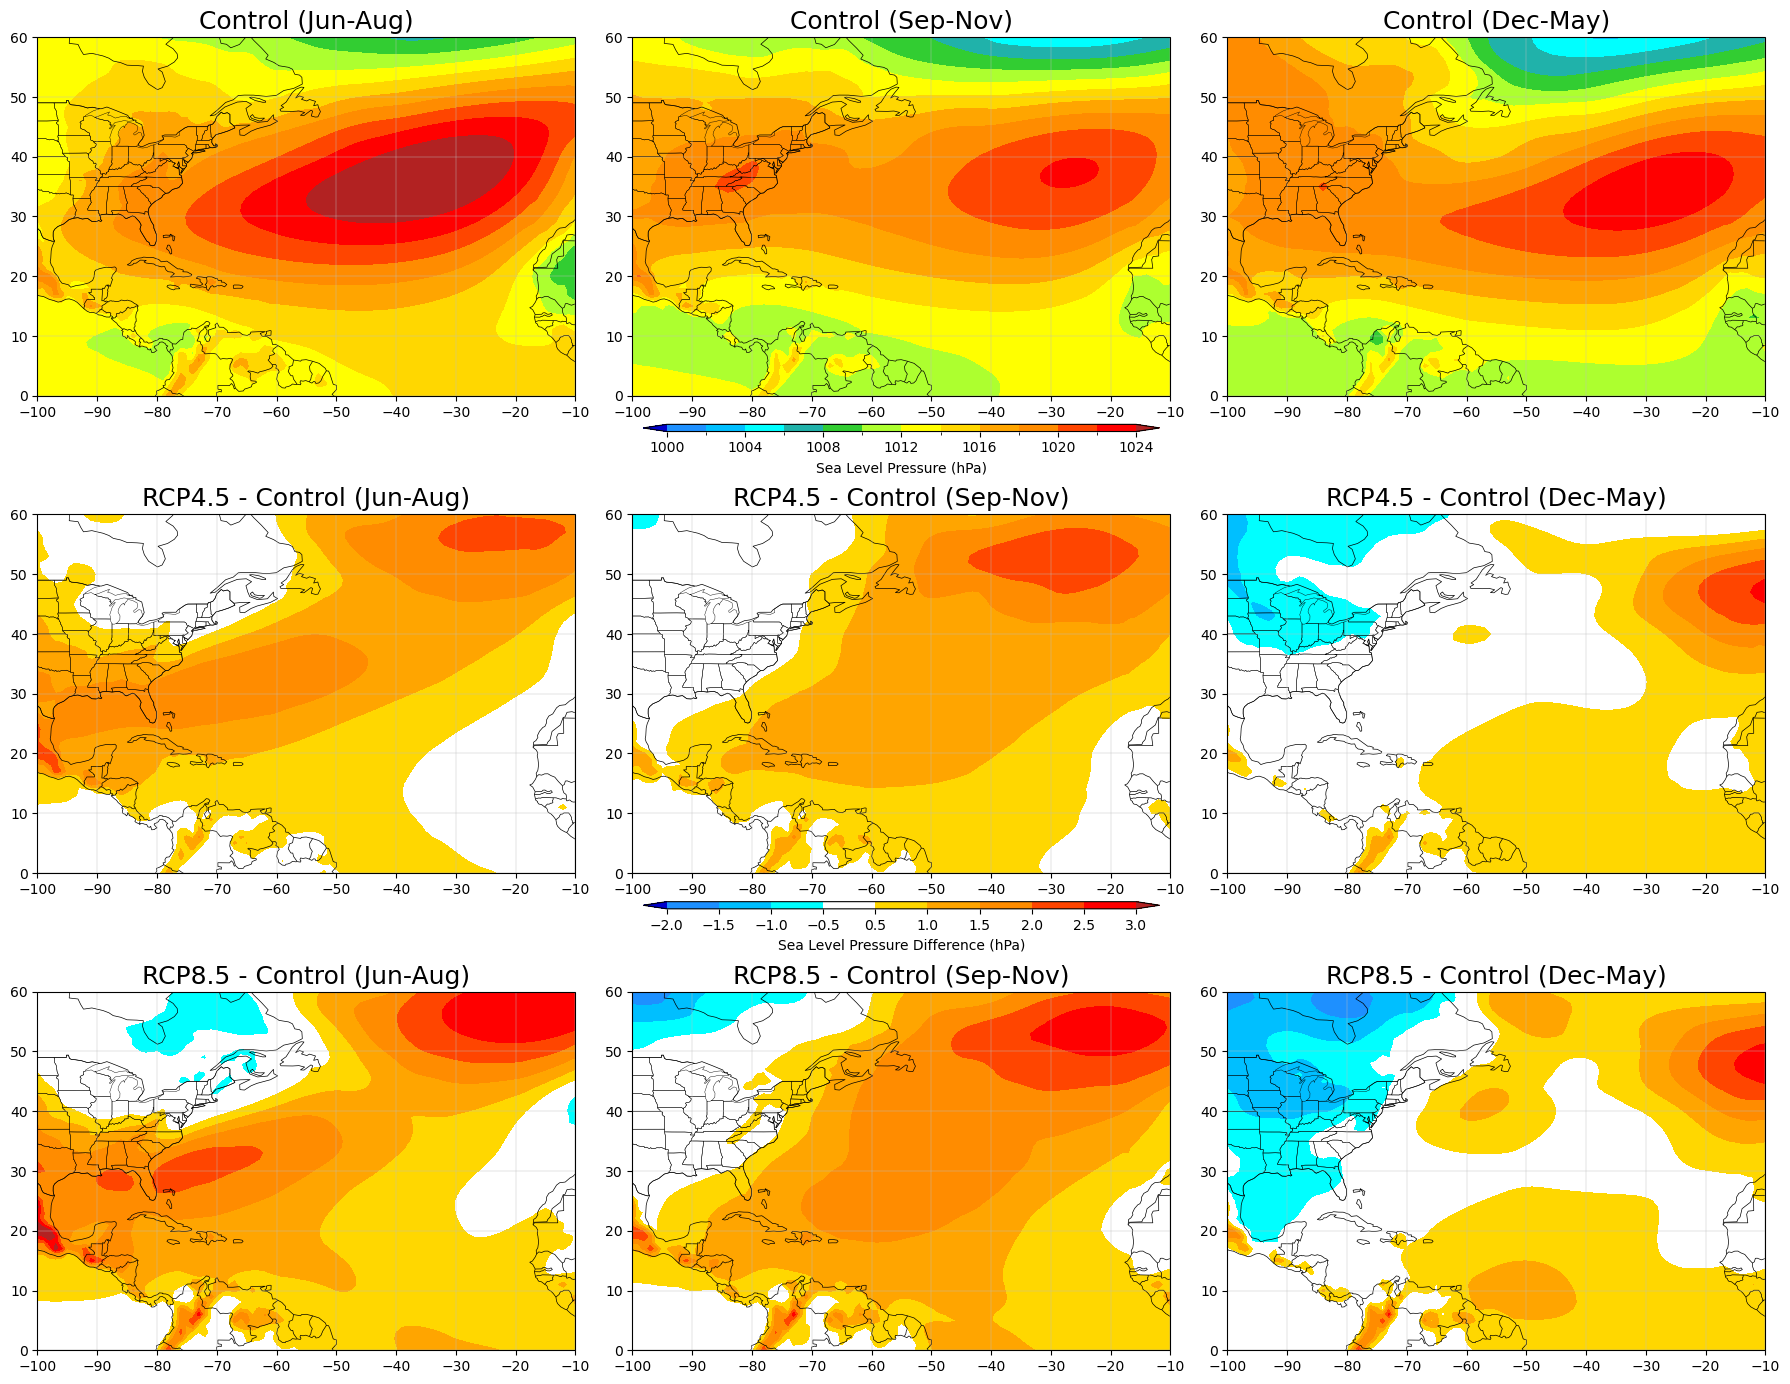

In [25]:
# Plot Sea Level Pressure Difference
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May']
Var = 'PSL'
Plev = 100000
Bounds, Colours = SLP_Bounds, SLP_Colours
Diff_Bounds, Diff_Colours = SLP_Diff_Bounds, SLP_Diff_Colours
Label, Diff_Label = 'Sea Level Pressure (hPa)', 'Sea Level Pressure Difference (hPa)'
Diff_Plot = True
Savefig = True
Figname = 'SLP_Seasons_Diff.png'
Variable_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Var, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Diff_Label, Diff_Plot, Savefig, Figname)

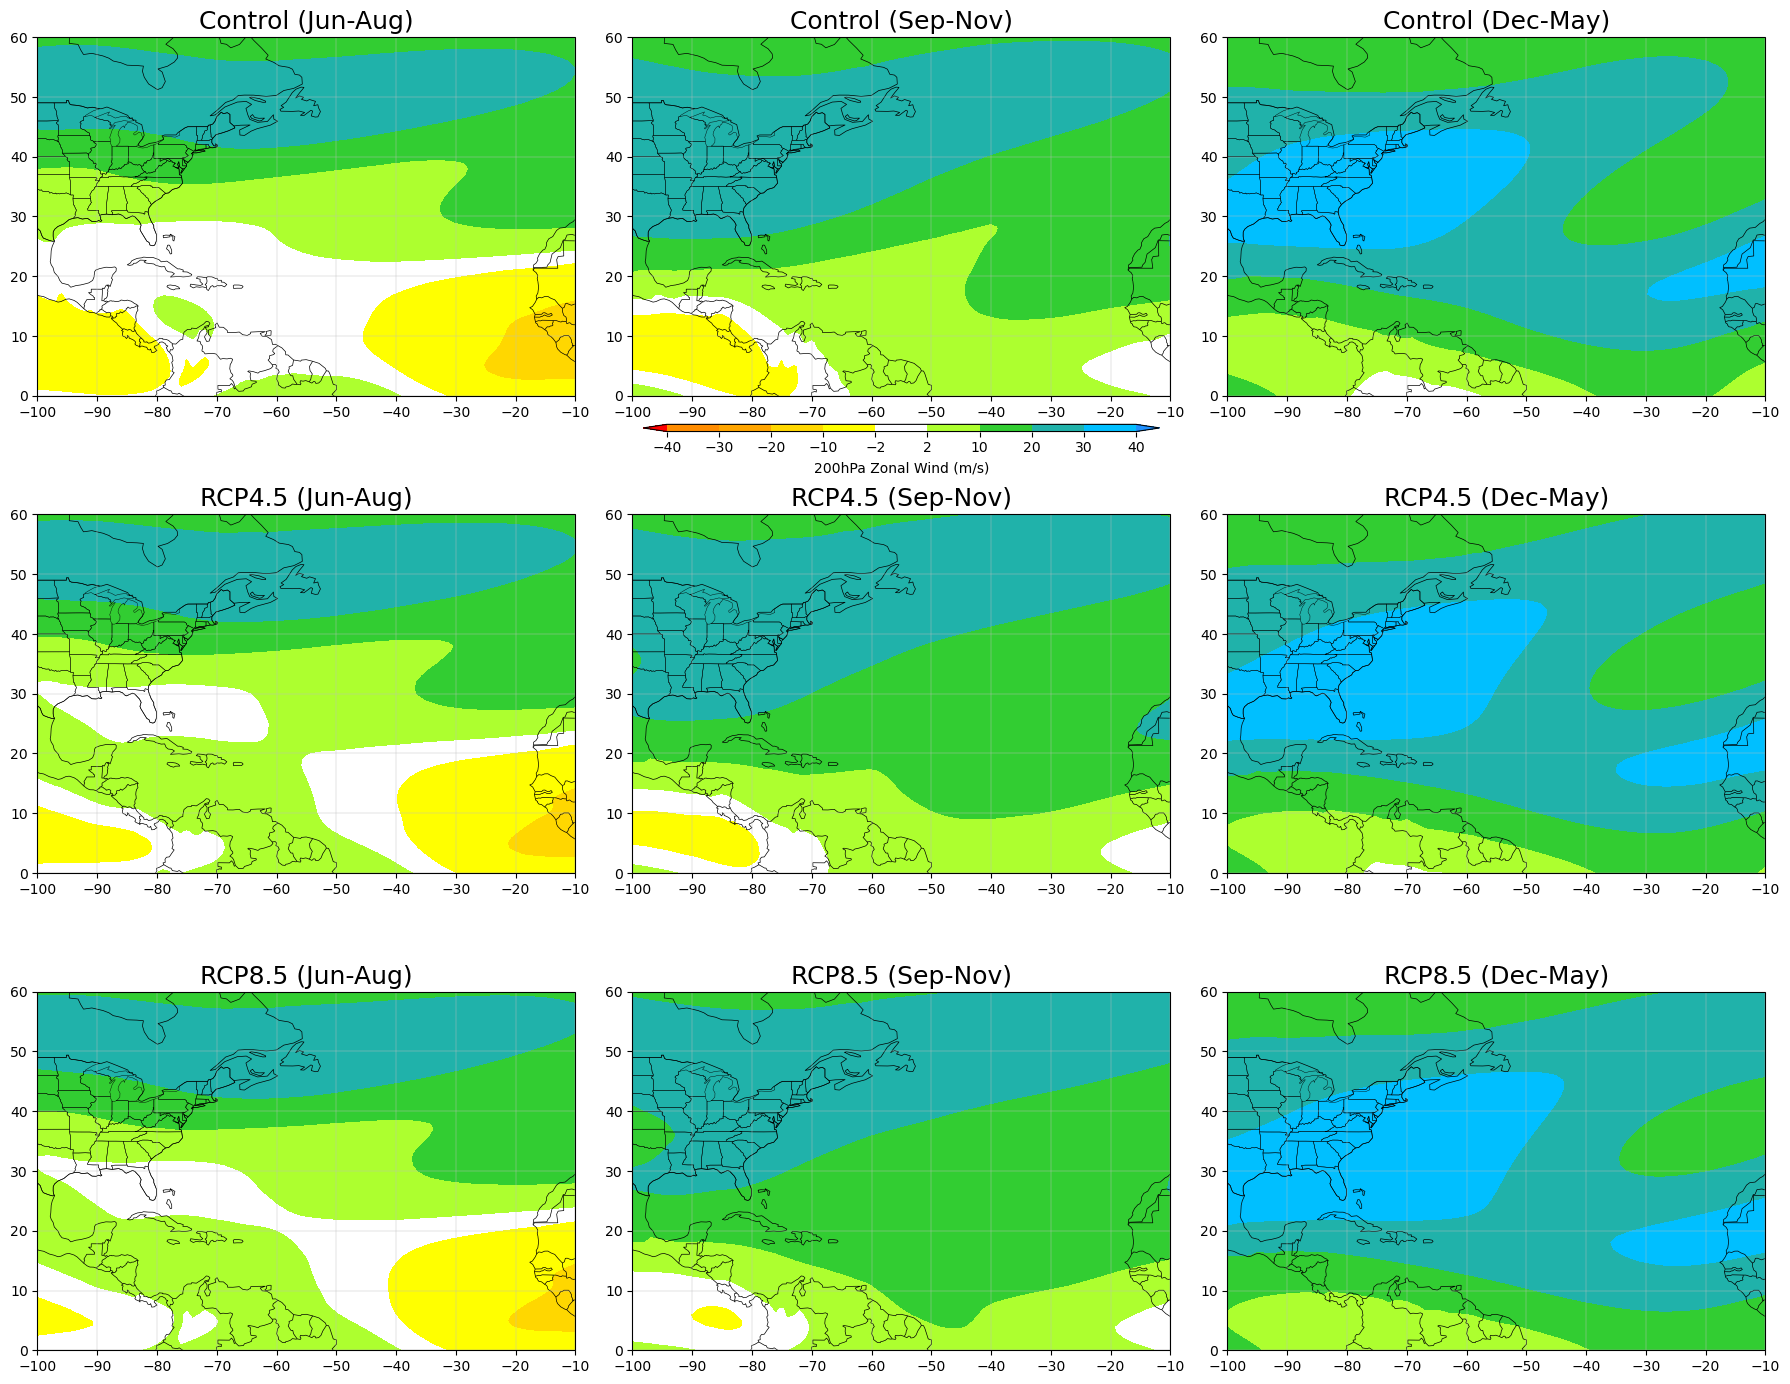

In [26]:
# Plot 200hPa Zonal Wind
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May']
Var = 'U'
Plev = 20000
Bounds, Colours = U_200hPa_Bounds, U_200hPa_Colours
Diff_Bounds, Diff_Colours = U_200hPa_Diff_Bounds, U_200hPa_Diff_Colours
Label, Diff_Label = '200hPa Zonal Wind (m/s)', '200hPa Zonal Wind Difference (m/s)'
Diff_Plot = False
Savefig = True
Figname = 'U_200hPa_Seasons.png'
Variable_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Var, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Diff_Label, Diff_Plot, Savefig, Figname)

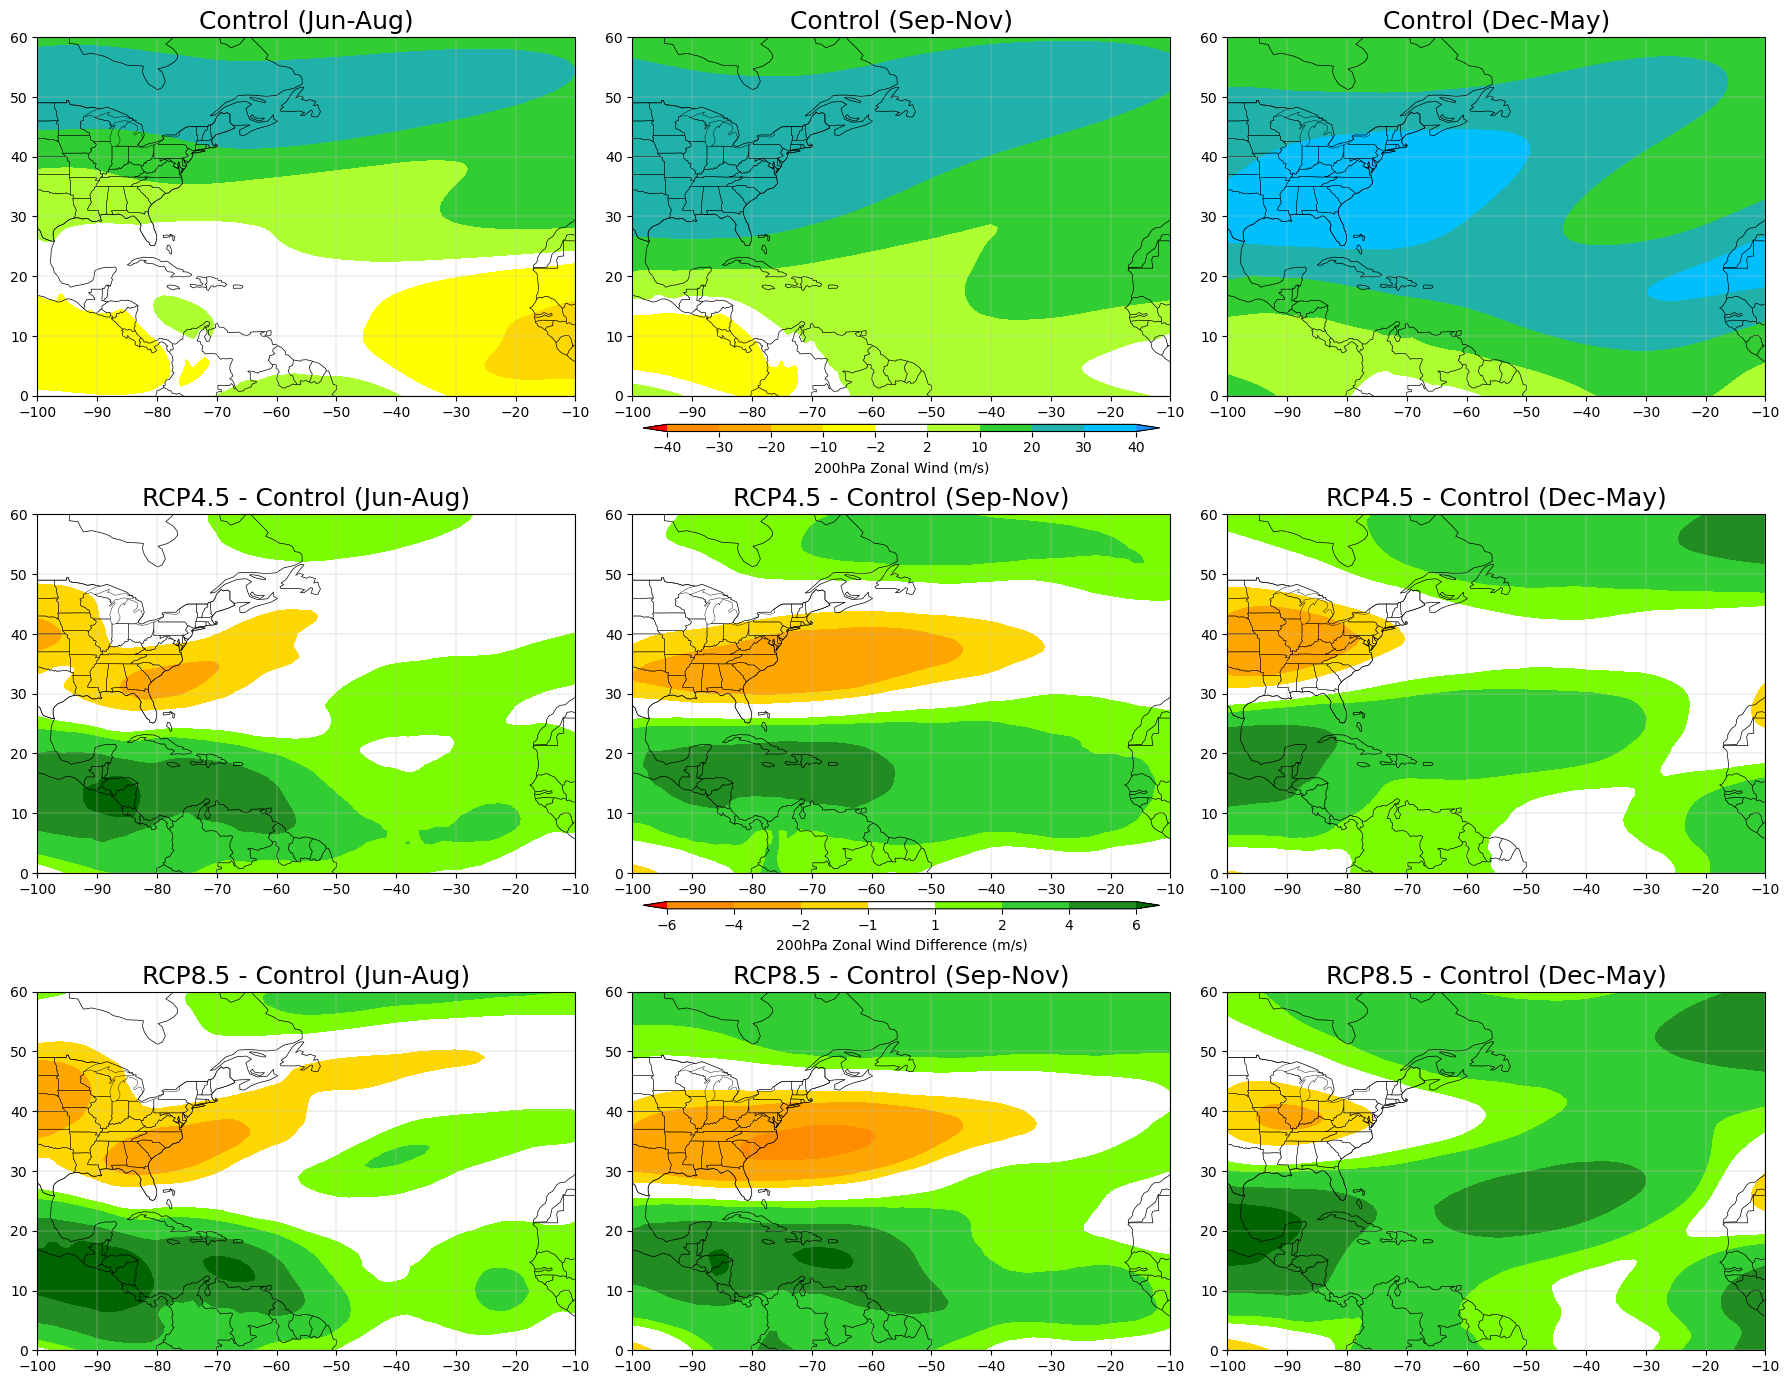

In [27]:
# Plot 200hPa Zonal Wind Difference
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May']
Var = 'U'
Plev = 20000
Bounds, Colours = U_200hPa_Bounds, U_200hPa_Colours
Diff_Bounds, Diff_Colours = U_200hPa_Diff_Bounds, U_200hPa_Diff_Colours
Label, Diff_Label = '200hPa Zonal Wind (m/s)', '200hPa Zonal Wind Difference (m/s)'
Diff_Plot = True
Savefig = True
Figname = 'U_200hPa_Seasons_Diff.png'
Variable_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Var, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Diff_Label, Diff_Plot, Savefig, Figname)

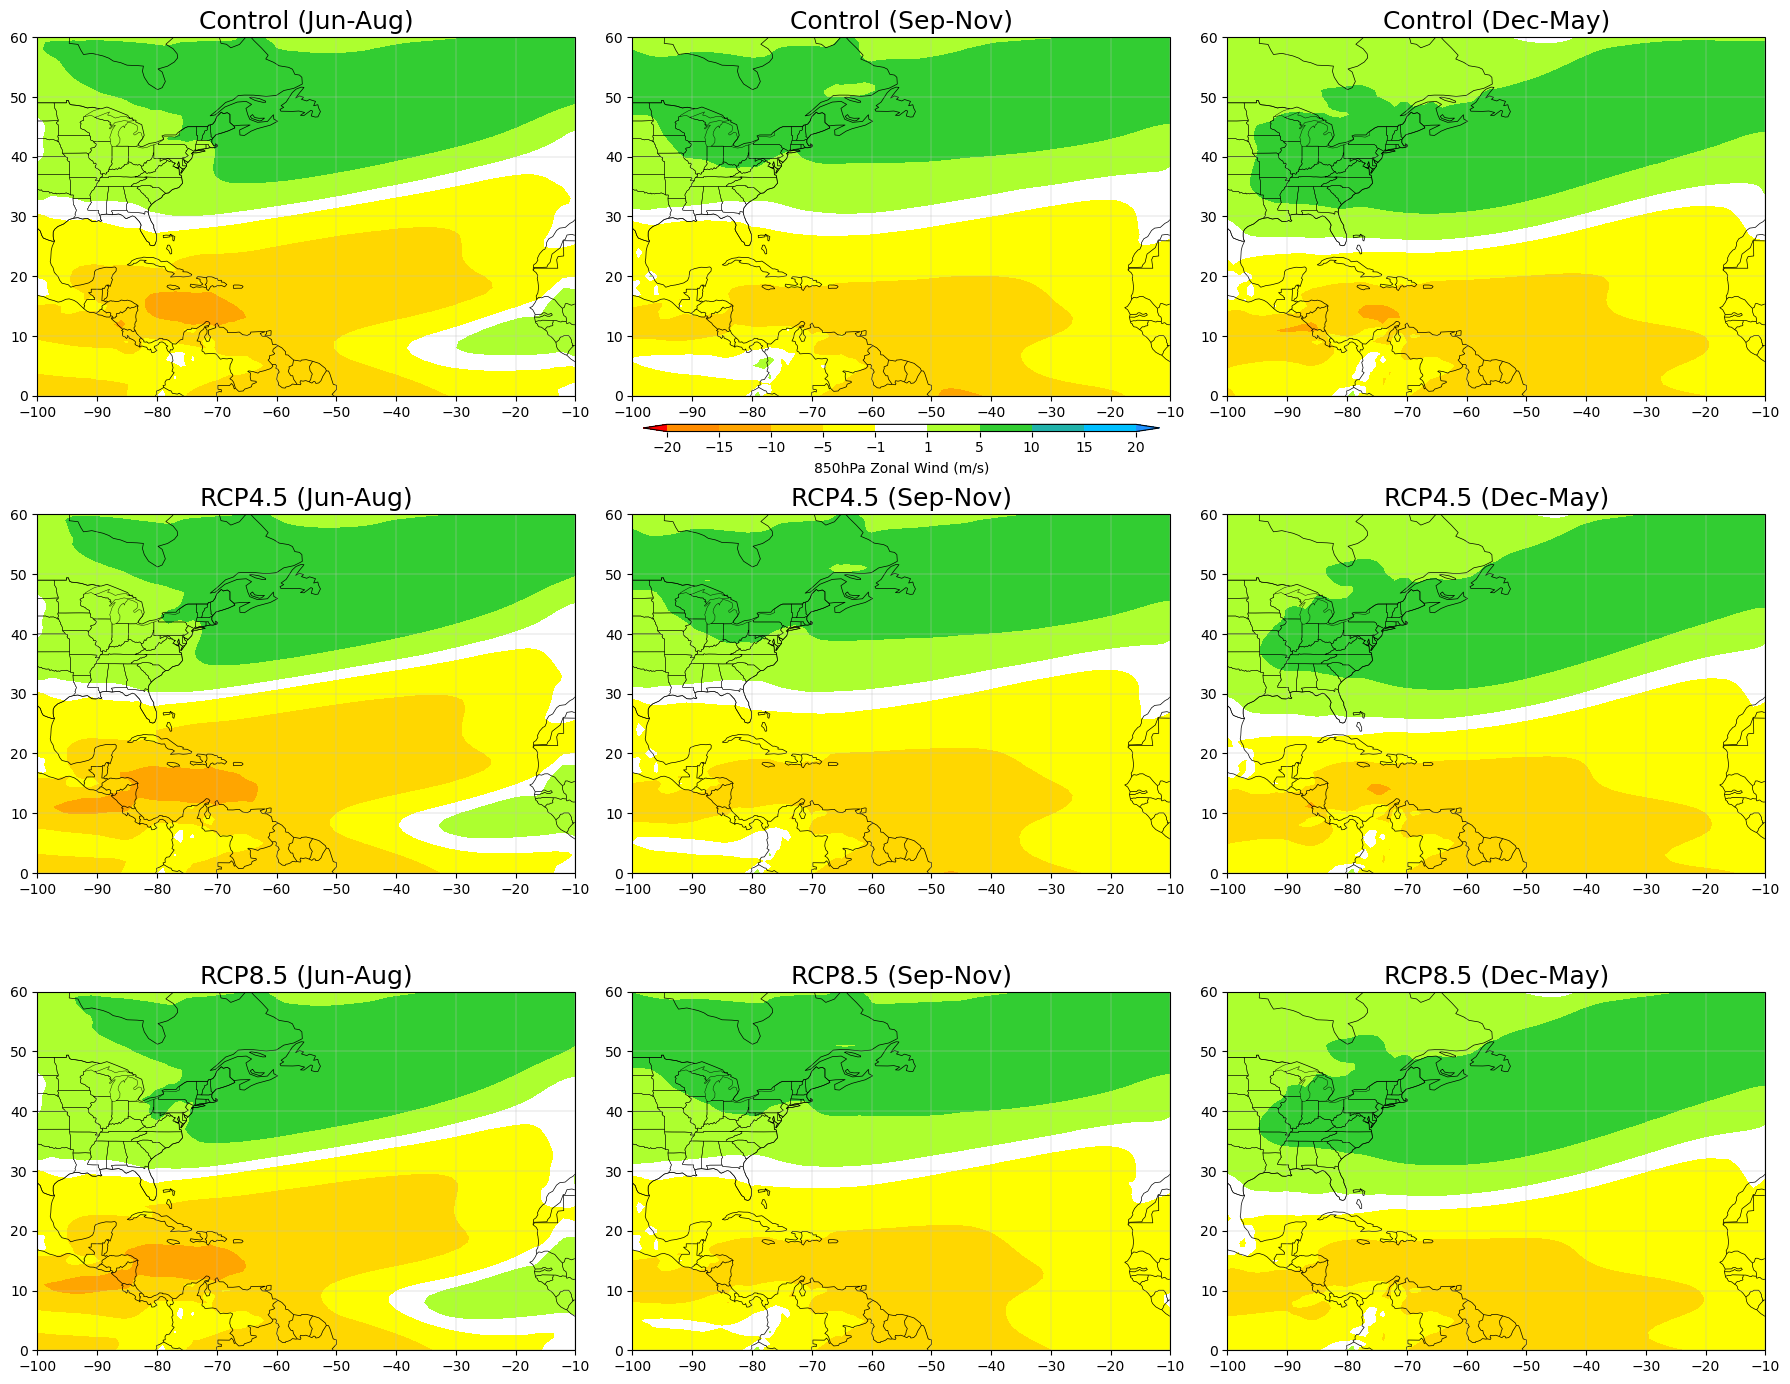

In [28]:
# Plot 850hPa Zonal Wind
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May']
Var = 'U'
Plev = 85000
Bounds, Colours = U_850hPa_Bounds, U_850hPa_Colours
Diff_Bounds, Diff_Colours = U_850hPa_Diff_Bounds, U_850hPa_Diff_Colours
Label, Diff_Label = '850hPa Zonal Wind (m/s)', '850hPa Zonal Wind Difference (m/s)'
Diff_Plot = False
Savefig = True
Figname = 'U_850hPa_Seasons.png'
Variable_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Var, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Diff_Label, Diff_Plot, Savefig, Figname)

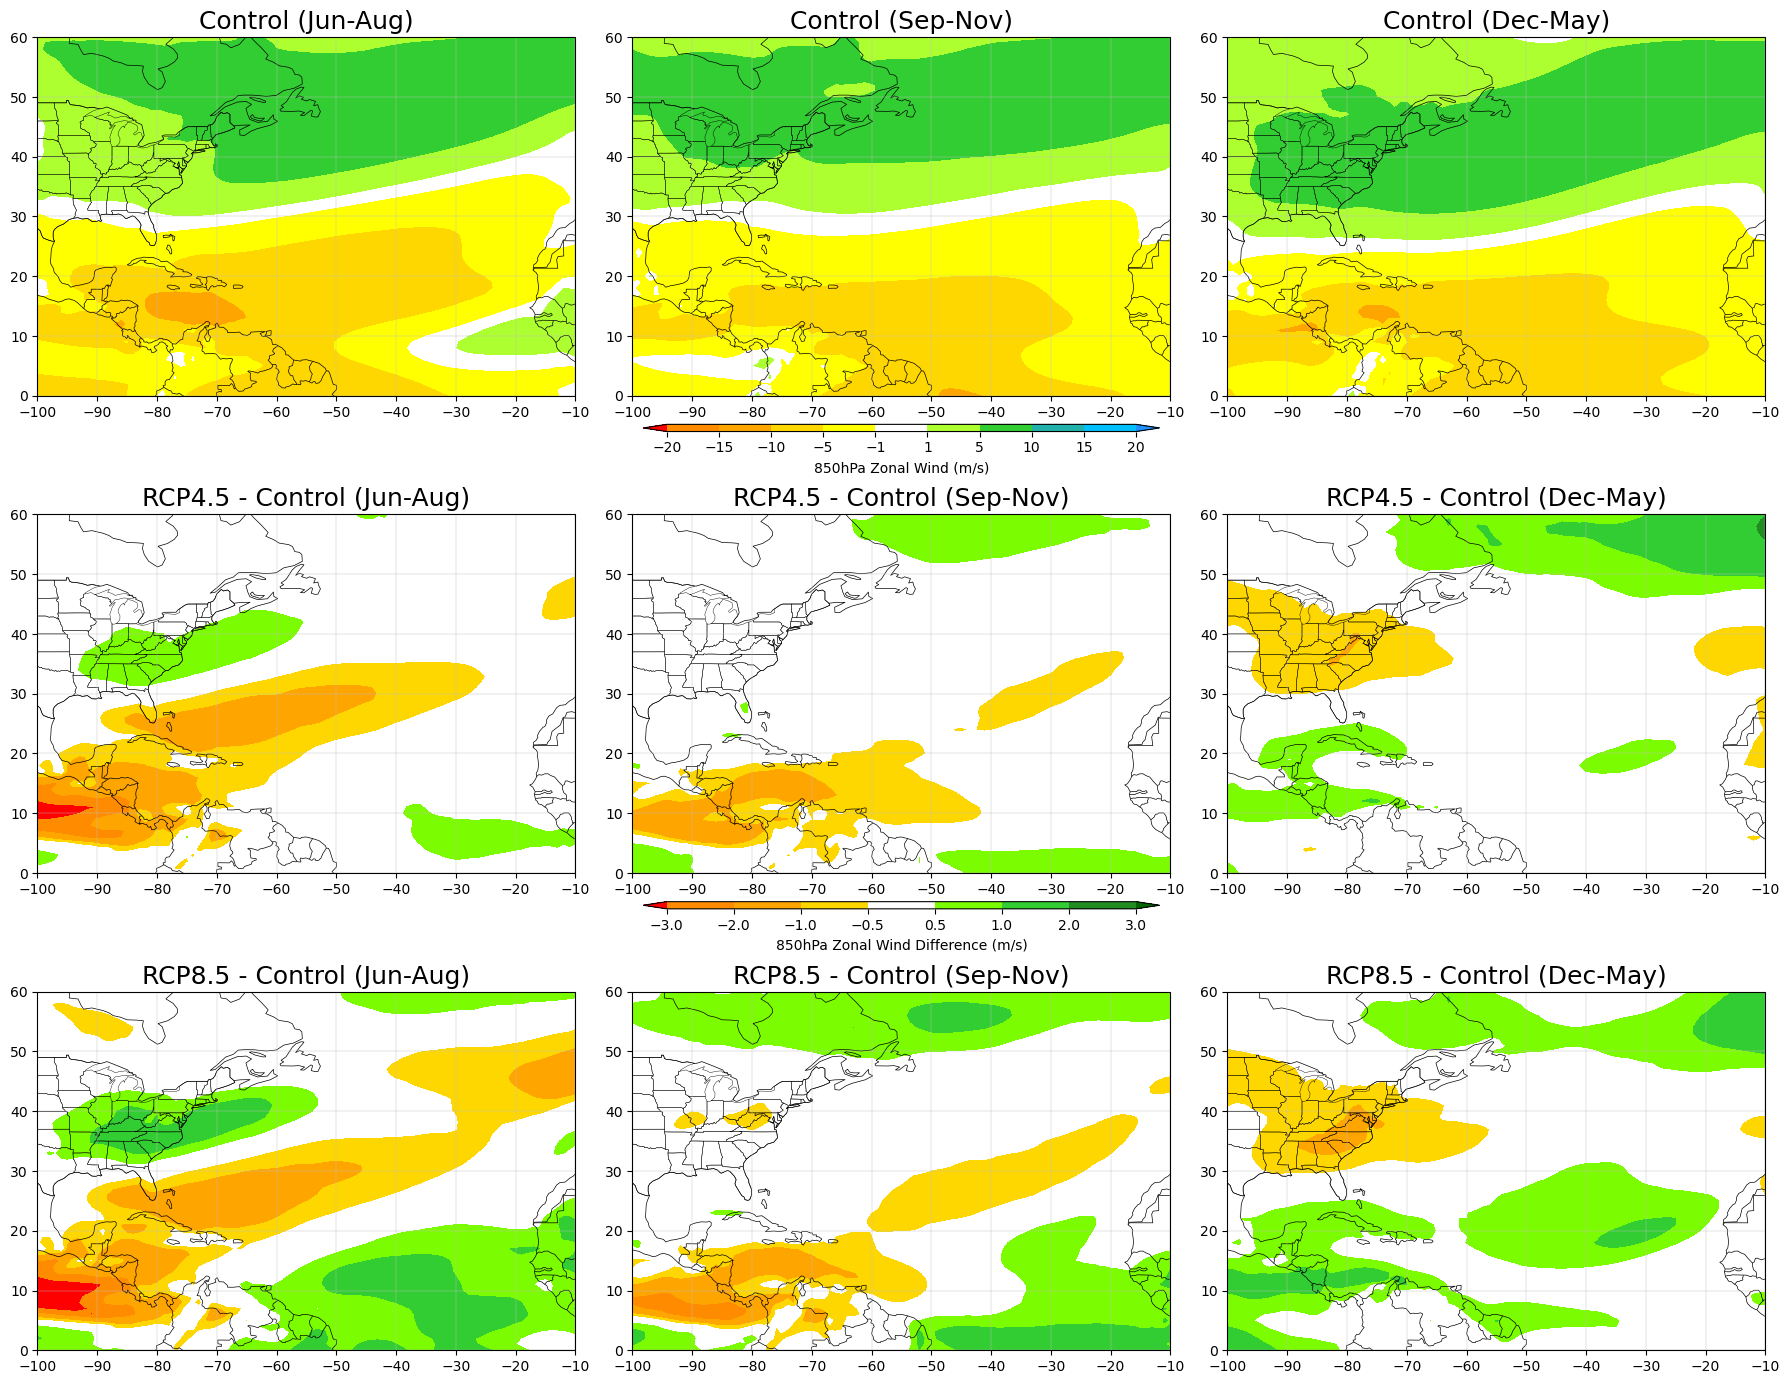

In [29]:
# Plot 850hPa Zonal Wind Difference
Months = ['Jun-Aug', 'Sep-Nov', 'Dec-May']
Var = 'U'
Plev = 85000
Bounds, Colours = U_850hPa_Bounds, U_850hPa_Colours
Diff_Bounds, Diff_Colours = U_850hPa_Diff_Bounds, U_850hPa_Diff_Colours
Label, Diff_Label = '850hPa Zonal Wind (m/s)', '850hPa Zonal Wind Difference (m/s)'
Diff_Plot = True
Savefig = True
Figname = 'U_850hPa_Seasons_Diff.png'
Variable_Contour_Plot(Control_DS_Dict, RCP45_DS_Dict, RCP85_DS_Dict, Months, Var, Plev, \
Bounds, Colours, Diff_Bounds, Diff_Colours, Label, Diff_Label, Diff_Plot, Savefig, Figname)

In [30]:
# Calculate Wind Shear (850hPa to 200hPa)